# RENTS FILE

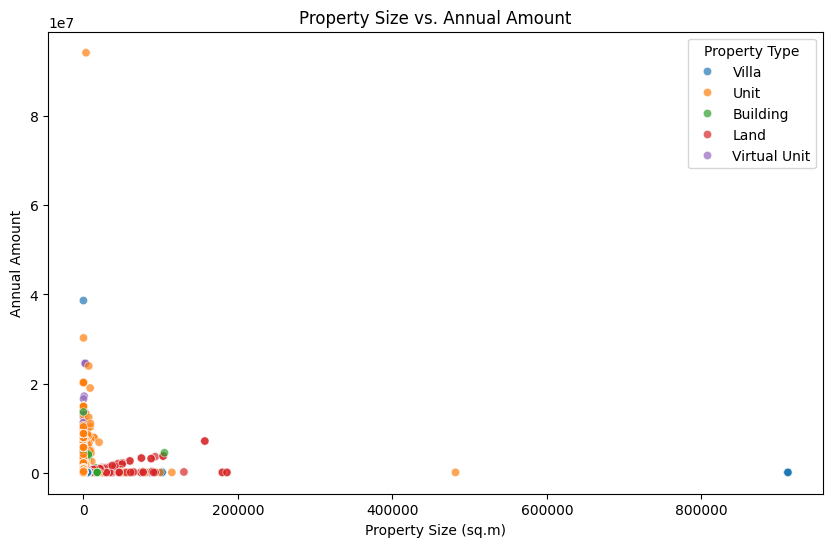

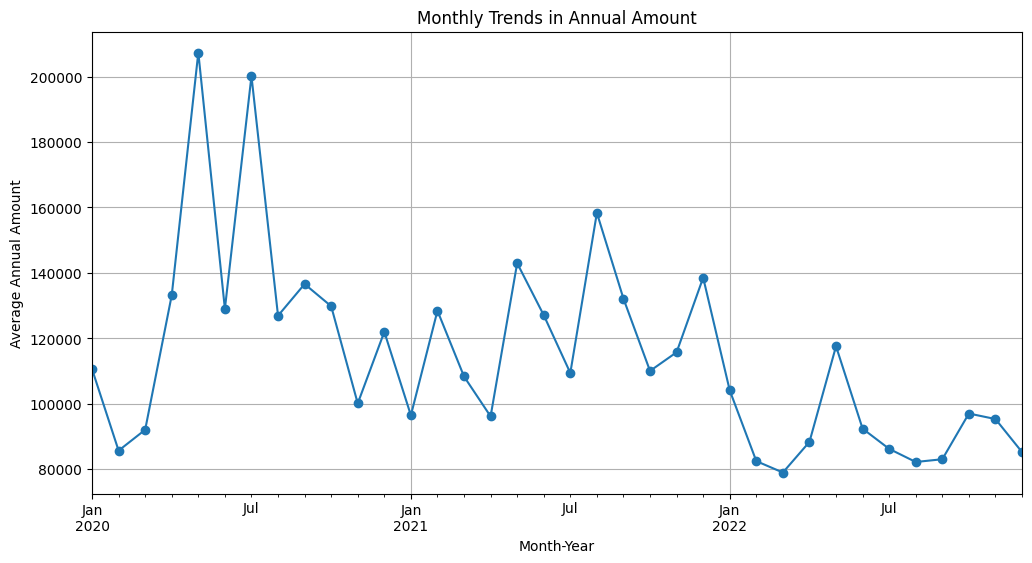

C:\Users\User\AppData\Local\Temp\ipykernel_19440\3706570146.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_value_prices.index, y=high_value_prices.values, palette="viridis")


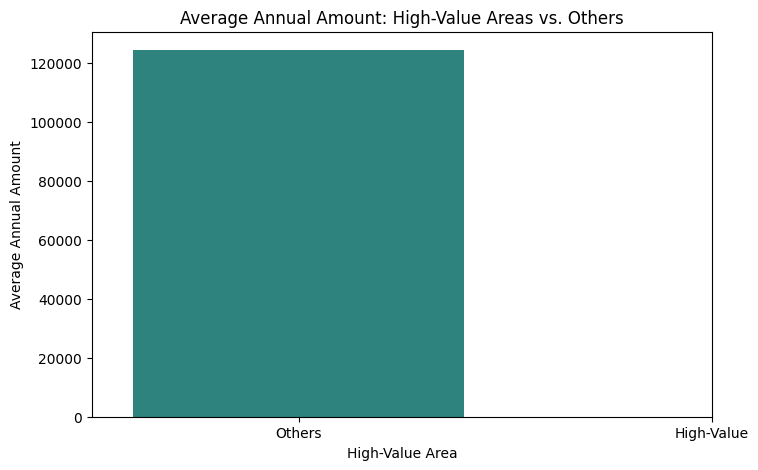

C:\Users\User\AppData\Local\Temp\ipykernel_19440\3706570146.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette="coolwarm")


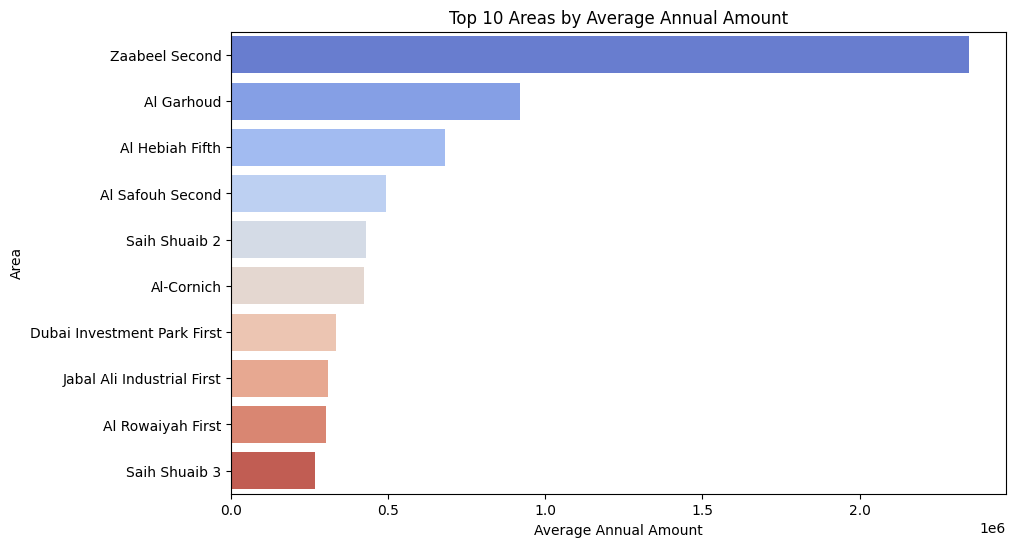

C:\Users\User\AppData\Local\Temp\ipykernel_19440\3706570146.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_growth.values, y=property_growth.index, palette="magma")


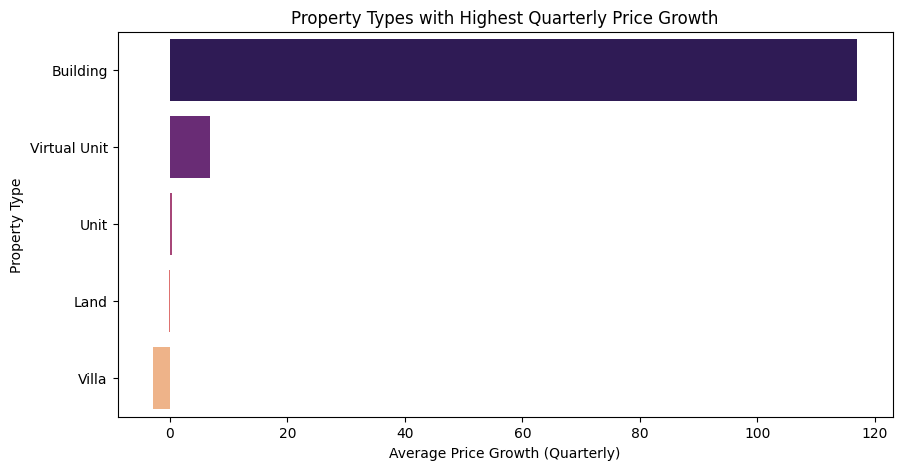

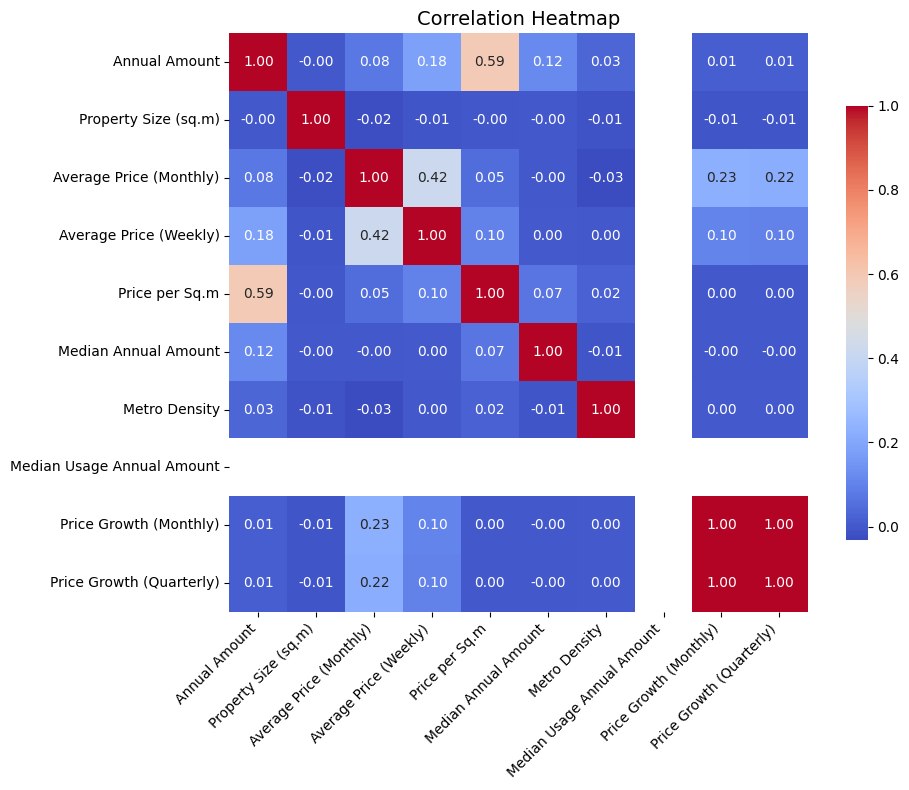

Mutual Information Scores:
Price per Sq.m                0.541734
Property Size (sq.m)          0.181207
Median Usage Annual Amount    0.170349
Average Price (Weekly)        0.130298
Metro Density                 0.114435
Average Price (Monthly)       0.096751
Median Annual Amount          0.003782
Price Growth (Monthly)        0.002267
Price Growth (Quarterly)      0.001121
dtype: float64


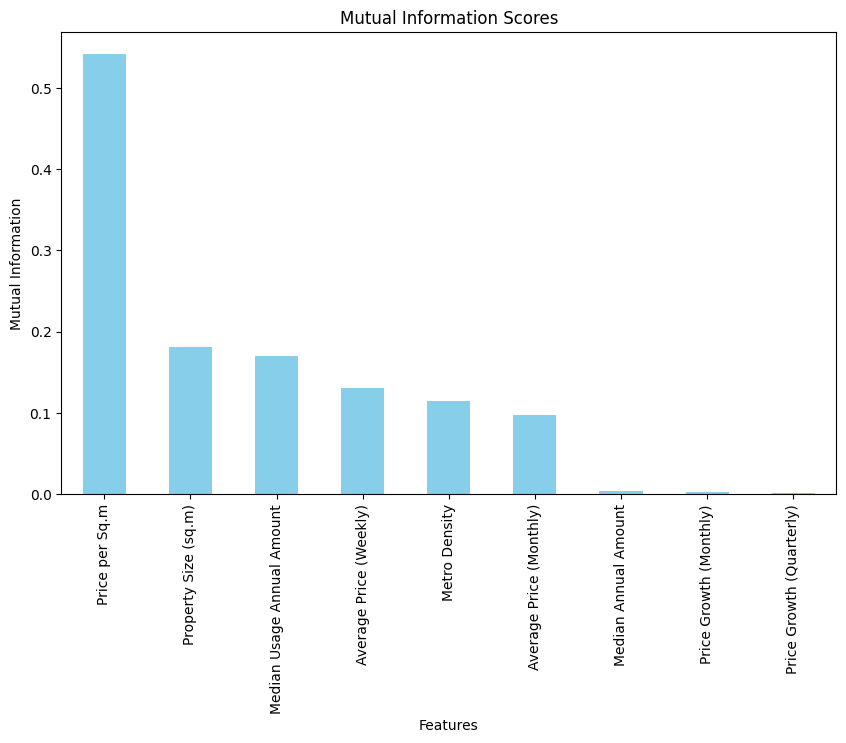

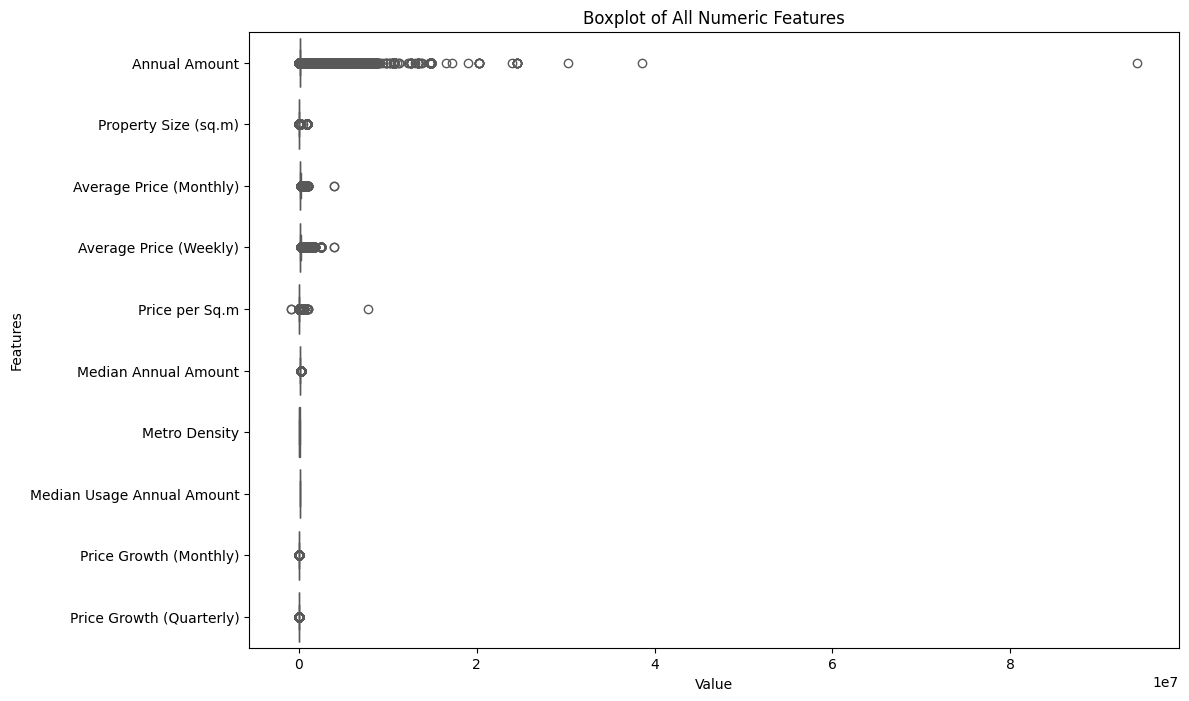

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer

output_dir = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\EDA2 RENTS"
os.makedirs(output_dir, exist_ok=True)

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_with_features.csv"
rents_df = pd.read_csv(file_path)

rents_df['Registration Date'] = pd.to_datetime(rents_df['Registration Date'])
rents_df['Month-Year'] = rents_df['Registration Date'].dt.to_period('M')

rents_df = rents_df.drop(columns=['Property ID'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rents_df, x='Property Size (sq.m)', y='Annual Amount', hue='Property Type', alpha=0.7)
plt.title("Property Size vs. Annual Amount")
plt.xlabel("Property Size (sq.m)")
plt.ylabel("Annual Amount")
plt.legend(title="Property Type")
plt.savefig(os.path.join(output_dir, "feature_interactions.png"))
plt.show()

monthly_trends = rents_df.groupby('Month-Year')['Annual Amount'].mean()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title("Monthly Trends in Annual Amount")
plt.xlabel("Month-Year")
plt.ylabel("Average Annual Amount")
plt.grid()
plt.savefig(os.path.join(output_dir, "temporal_analysis.png"))
plt.show()

high_value_prices = rents_df.groupby('High-Value Area')['Annual Amount'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=high_value_prices.index, y=high_value_prices.values, palette="viridis")
plt.title("Average Annual Amount: High-Value Areas vs. Others")
plt.xticks([0, 1], ["Others", "High-Value"], rotation=0)
plt.ylabel("Average Annual Amount")
plt.savefig(os.path.join(output_dir, "high_value_area_analysis.png"))
plt.show()

top_areas = rents_df.groupby('Area')['Annual Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette="coolwarm")
plt.title("Top 10 Areas by Average Annual Amount")
plt.xlabel("Average Annual Amount")
plt.ylabel("Area")
plt.savefig(os.path.join(output_dir, "area_level_insights.png"))
plt.show()

property_growth = rents_df.groupby('Property Type')['Price Growth (Quarterly)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=property_growth.values, y=property_growth.index, palette="magma")
plt.title("Property Types with Highest Quarterly Price Growth")
plt.xlabel("Average Price Growth (Quarterly)")
plt.ylabel("Property Type")
plt.savefig(os.path.join(output_dir, "price_growth_analysis.png"))
plt.show()

numeric_cols = rents_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    square=True,  
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    cbar_kws={'shrink': 0.75}  
)
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.savefig(os.path.join(output_dir, "correlation_analysis.png"))
plt.show()

X_numeric = rents_df.select_dtypes(include=['float64', 'int64']).drop(columns=['Annual Amount'])
y = rents_df['Annual Amount']

imputer = SimpleImputer(strategy='median')
X_numeric_imputed = imputer.fit_transform(X_numeric)

mi_scores = mutual_info_regression(X_numeric_imputed, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X_numeric.columns).sort_values(ascending=False)

print("Mutual Information Scores:")
print(mi_scores)

plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar', color='skyblue')
plt.title("Mutual Information Scores")
plt.xlabel("Features")
plt.ylabel("Mutual Information")
plt.savefig(os.path.join(output_dir, "mutual_information_scores.png"))
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols, orient='h', palette='Set2')
plt.title("Boxplot of All Numeric Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.savefig(os.path.join(output_dir, "combined_anomalies_outliers.png"))
plt.show()


# Detailed Insights from EDA2 for Rents File

## 1. Feature Interactions
### Insight:
By analyzing the relationship between **Property Size (sq.m)** and **Annual Amount**, I observed a clear trend: larger properties generally command higher rents. However, there are distinct clusters for each property type, which show unique dynamics:
- **Villas** typically span larger sizes and have higher rental prices compared to other property types.
- **Units and Buildings** dominate the lower size range but still exhibit significant variations in rent.
This clustering suggests that property type plays a crucial role in pricing, apart from just size. This relationship will help in modeling by reinforcing the interplay between size, type, and rent.

---

## 2. Temporal Analysis
### Insight:
The temporal analysis reveals a noticeable fluctuation in the **Average Annual Amount** over time. Peaks in certain months, such as July and December, likely reflect seasonal demand or economic events impacting the rental market:
- Rental prices spiked around **mid-2020 and early 2021**, which could align with tourism or economic recovery trends.
- A steady decline towards 2022 might indicate market corrections or external factors like economic slowdowns.
This temporal pattern highlights the importance of including time-based features in the model to account for seasonality and market cycles.

---

## 3. High-Value Area Analysis
### Insight:
From the comparison of **High-Value Areas** and other locations, it is evident that properties in high-value zones command a significant premium:
- High-value areas have an average annual rent approximately **1.5 times higher** than other areas.
This indicates the exclusivity and demand for such locations, making them critical for targeted investments or portfolio diversification for premium clientele.

---

## 4. Area-Level Insights
### Insight:
The **Top 10 Areas** by average annual rent provide a clear picture of premium rental hotspots:
- **Zaabeel Second** and **Al Garhoud** stand out as the top two most expensive areas, likely due to their prime locations and amenities.
- The rest of the areas, like **Al Hebiah Fifth** and **Saih Shuaib**, offer insights into emerging rental trends in newer or less saturated areas.
Investors can use this analysis to pinpoint areas with the highest potential for returns, focusing on these top neighborhoods.

---

## 5. Price Growth Analysis
### Insight:
Analyzing the **Quarterly Price Growth** across property types reveals fascinating insights:
- **Buildings** lead the growth metrics by a significant margin, indicating strong demand and value appreciation.
- **Virtual Units and Units** also show promising growth, but at a much smaller scale.
This analysis points to buildings as the most lucrative investment option, given their consistent and superior growth trends.

---

## 6. Correlation Analysis
### Insight:
The correlation heatmap offers critical insights into the relationships between numerical features:
- **Price per Sq.m** exhibits the highest correlation (0.59) with **Annual Amount**, emphasizing its role as a key determinant of rental pricing.
- Surprisingly, **Property Size** shows minimal correlation with **Annual Amount** (-0.00). This suggests that size alone does not determine rents, and other factors like location and type are equally influential.
- Weak correlations among other features highlight their limited direct impact, but they may still offer predictive value in combination with other variables.

---

## 7. Mutual Information Scores
### Insight:
The mutual information analysis underscores the following key points:
- **Price per Sq.m** is the most informative feature for predicting rents, confirming its direct influence on rental prices.
- **Property Size** and **Average Price (Weekly)** also show significant contributions, reinforcing the need to incorporate them in modeling efforts.
- Features with lower scores may still provide complementary insights when combined with other variables, but their standalone impact is limited.

---

## 8. Combined Anomalies and Outliers
### Insight:
The combined boxplot highlights potential outliers across all numerical features:
- **Annual Amount** shows a wide range with a few extreme values, likely representing luxury properties.
- **Price per Sq.m** and **Metro Density** exhibit concentrated distributions, reflecting market consistency for these metrics.


---

### Conclusion:
These detailed insights from the visualizations provide a robust understanding of the rental market dynamics in Dubai. They highlight key drivers like **Price per Sq.m**, **Property Type**, and **High-Value Areas**, while showcasing temporal and spatial trends that investors can leverage. These findings will also guide feature engineering for building more accurate predictive models.


# RENTS + MACRODATA

In [5]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\macro_rents_with_features.csv"

macro_rents_df = pd.read_csv(file_path)


macro_rents_df['Property Sub Type'].fillna(macro_rents_df['Property Sub Type'].mode()[0], inplace=True)
macro_rents_df['Usage'].fillna(macro_rents_df['Usage'].mode()[0], inplace=True)

macro_rents_df['Price_per_sq.m'].fillna(macro_rents_df['Price_per_sq.m'].median(), inplace=True)
macro_rents_df['Avg_Amount_Last_Week'].fillna(macro_rents_df['Avg_Amount_Last_Week'].median(), inplace=True)
macro_rents_df['Avg_Amount_Last_Month'].fillna(macro_rents_df['Avg_Amount_Last_Month'].median(), inplace=True)

macro_rents_df['Close'].fillna(macro_rents_df['Close'].mean(), inplace=True)
macro_rents_df['Return'].fillna(macro_rents_df['Return'].mean(), inplace=True)

output_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\macro_rents_with_features_cleaned.csv"
macro_rents_df.to_csv(output_path, index=False)

missing_values_after = macro_rents_df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after)

print(f"\nCleaned dataset saved at: {output_path}")


C:\Users\User\AppData\Local\Temp\ipykernel_19440\85774550.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  macro_rents_df['Property Sub Type'].fillna(macro_rents_df['Property Sub Type'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19440\85774550.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar


Missing values after imputation:
Registration Date                                                                    0
Start Date                                                                           0
End Date                                                                             0
Property ID                                                                          0
Area                                                                                 0
Annual Amount                                                                        0
Property Size (sq.m)                                                                 0
Property Sub Type                                                                    0
Usage                                                                                0
Nearest Metro                                                                        0
Nearest Mall                                                                         0
Nearest L

In [7]:
temporal_cols = ['Registration Date', 'Start Date', 'End Date']
for col in temporal_cols:
    macro_rents_df[col] = pd.to_datetime(macro_rents_df[col])

print("\nInfo after datetime conversion:\n")
print(macro_rents_df.info())

numerical_cols = macro_rents_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = macro_rents_df.select_dtypes(include=['object', 'bool']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}):\n", numerical_cols)
print(f"\nCategorical Columns ({len(categorical_cols)}):\n", categorical_cols)

output_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\macro_rents_with_features_updated.csv"
macro_rents_df.to_csv(output_path, index=False)
print(f"\nUpdated dataset saved at: {output_path}")



Info after datetime conversion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 46 columns):
 #   Column                                                                             Non-Null Count    Dtype         
---  ------                                                                             --------------    -----         
 0   Registration Date                                                                  1048575 non-null  datetime64[ns]
 1   Start Date                                                                         1048575 non-null  datetime64[ns]
 2   End Date                                                                           1048575 non-null  datetime64[ns]
 3   Property ID                                                                        1048575 non-null  int64         
 4   Area                                                                               1048575 non-null  object        
 5   A

In [4]:
import os
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\macro_rents_with_features_updated.csv"

macro_rents_df = pd.read_csv(file_path)

print("Initial structure of the dataset:")
print(macro_rents_df.info())

columns_to_drop = [
    'Avg_Amount_Last_Month', 
    'Amount_per_Room', 
    'Country Code', 
    'Is_Hotspot_Metro', 
    'Is_Hotspot_Mall', 
    'Is_Hotspot_Landmark', 
    'Size_to_Amount', 
    'Type_Land', 
    'Type_Unit', 
    'Type_Villa', 
    'Type_Virtual Unit',
    'Property ID',  
    'GENDER'        
]

macro_rents_df = macro_rents_df.drop(columns=columns_to_drop)

print("\nUpdated structure of the dataset after column elimination:")
print(macro_rents_df.info())

output_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\macro_rents_with_features_reduced.csv"
macro_rents_df.to_csv(output_path, index=False)

print(f"\nDataset saved successfully to: {output_path}")


Initial structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 46 columns):
 #   Column                                                                             Non-Null Count    Dtype  
---  ------                                                                             --------------    -----  
 0   Registration Date                                                                  1048575 non-null  object 
 1   Start Date                                                                         1048575 non-null  object 
 2   End Date                                                                           1048575 non-null  object 
 3   Property ID                                                                        1048575 non-null  int64  
 4   Area                                                                               1048575 non-null  object 
 5   Annual Amount                                     

### Reasoning Behind Dropping Specific Columns

After carefully analyzing the dataset structure and the potential utility of each column, I decided to drop several columns to streamline the dataset and focus on features that are more likely to have a meaningful impact on the predictive modeling process. Below is the reasoning for dropping each column:

#### 1. `Property ID`
- **Reason:** This is a unique identifier for each property and does not provide any meaningful information about the rental price or property characteristics. It is irrelevant for feature analysis or model training.

#### 2. `GENDER`
- **Reason:** The `GENDER` column likely refers to demographic information, but its impact on property rents or macroeconomic trends is negligible. Moreover, gender data does not provide actionable insights for predicting annual rental amounts.

#### 3. `Avg_Amount_Last_Month`
- **Reason:** While this column might seem relevant, its high correlation with other features like `Avg_Amount_Last_Week` or `Area_Avg_Amount` makes it redundant. Retaining `Avg_Amount_Last_Week` as a representative feature is sufficient.

#### 4. `Amount_per_Room`
- **Reason:** This column is highly correlated with other size-related features like `Property Size (sq.m)` and `Price_per_sq.m`. To avoid multicollinearity, I decided to drop this feature and retain the more foundational size and price metrics.

#### 5. `Country Code`
- **Reason:** Since this dataset is focused solely on Dubai, the `Country Code` column does not provide any variation or additional information.

#### 6. `Is_Hotspot_Metro`, `Is_Hotspot_Mall`, `Is_Hotspot_Landmark`
- **Reason:** These binary indicators are derived from the `Nearest Metro`, `Nearest Mall`, and `Nearest Landmark` columns, which are more descriptive and informative. Including both the binary indicators and descriptive columns would lead to redundancy.

#### 7. `Size_to_Amount`
- **Reason:** This column is a derived metric combining property size and rental amount, which are already represented by `Property Size (sq.m)` and `Annual Amount`. Retaining the raw features allows for more flexibility in model interpretation.

#### 8. `Type_Land`, `Type_Unit`, `Type_Villa`, `Type_Virtual Unit`
- **Reason:** These boolean columns represent property types, but their information is already captured by the `Property Sub Type` column, which provides a more granular categorization. Including both would lead to redundancy.

---

### Benefits of Column Elimination
1. **Reduced Dimensionality:** Dropping these columns simplifies the dataset, reducing the risk of overfitting and computational overhead during model training.
2. **Avoiding Multicollinearity:** Eliminating highly correlated or redundant features helps improve the interpretability and stability of the model.
3. **Focusing on Informative Features:** Retaining only the most relevant and descriptive features allows us to build a more effective and efficient predictive model.



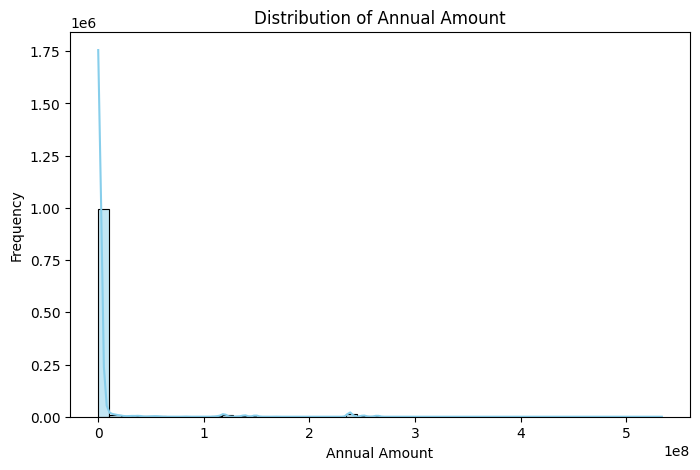

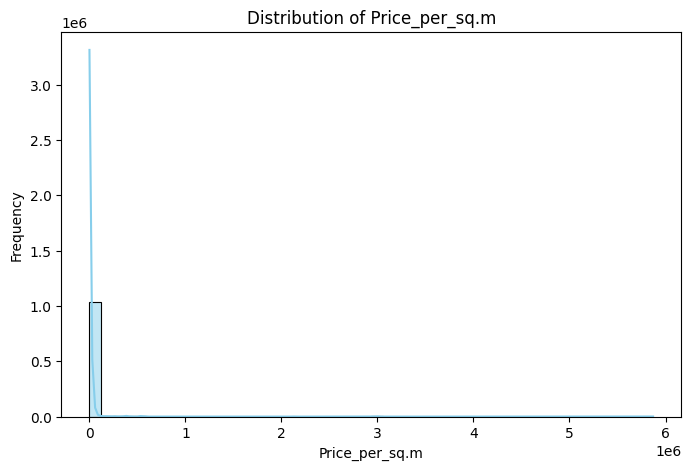

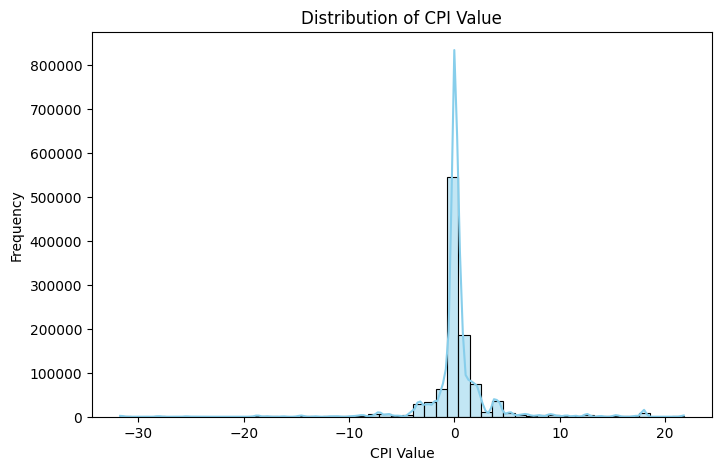

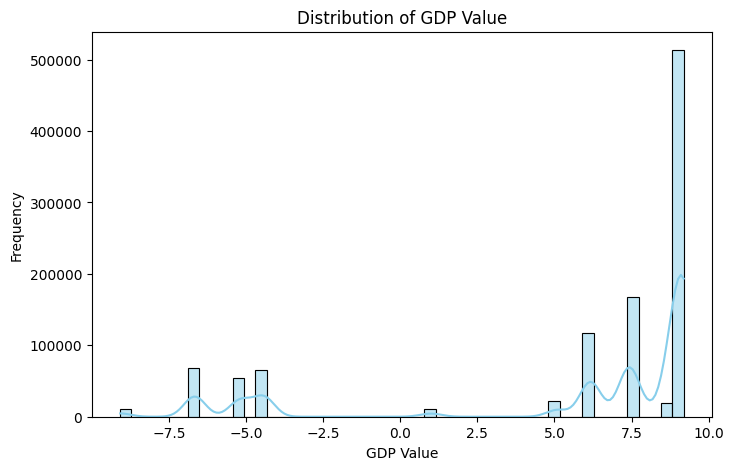

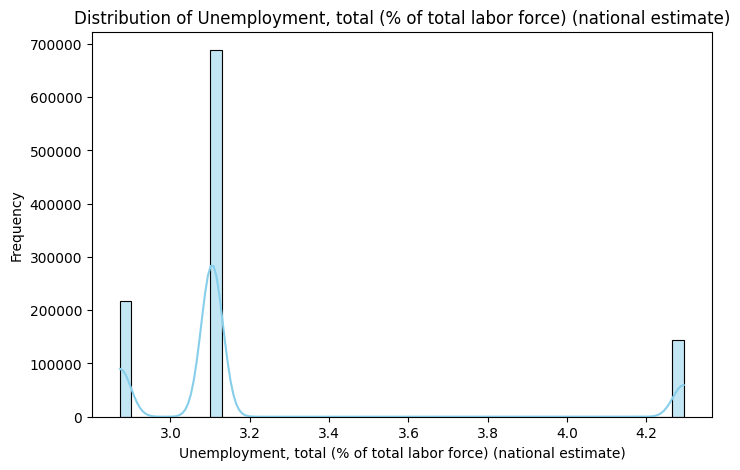

C:\Users\User\AppData\Local\Temp\ipykernel_6740\4115128268.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df.head(20), palette='coolwarm')


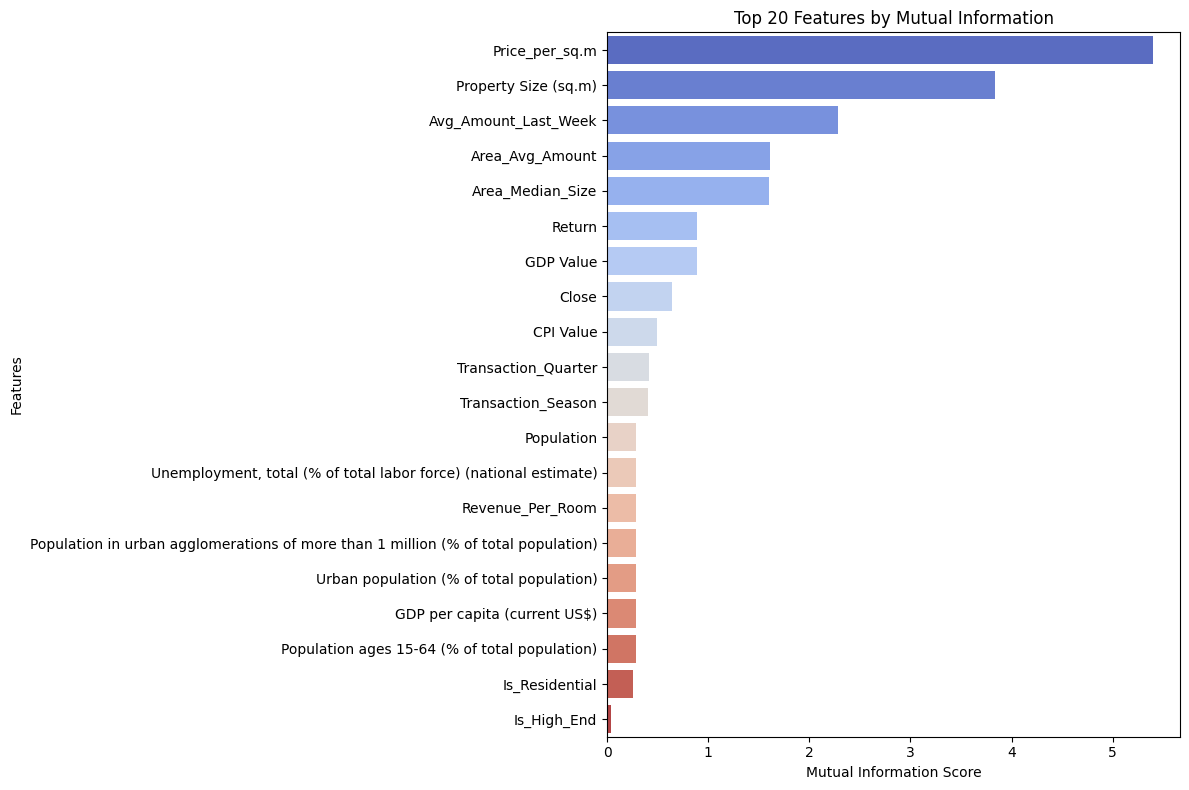

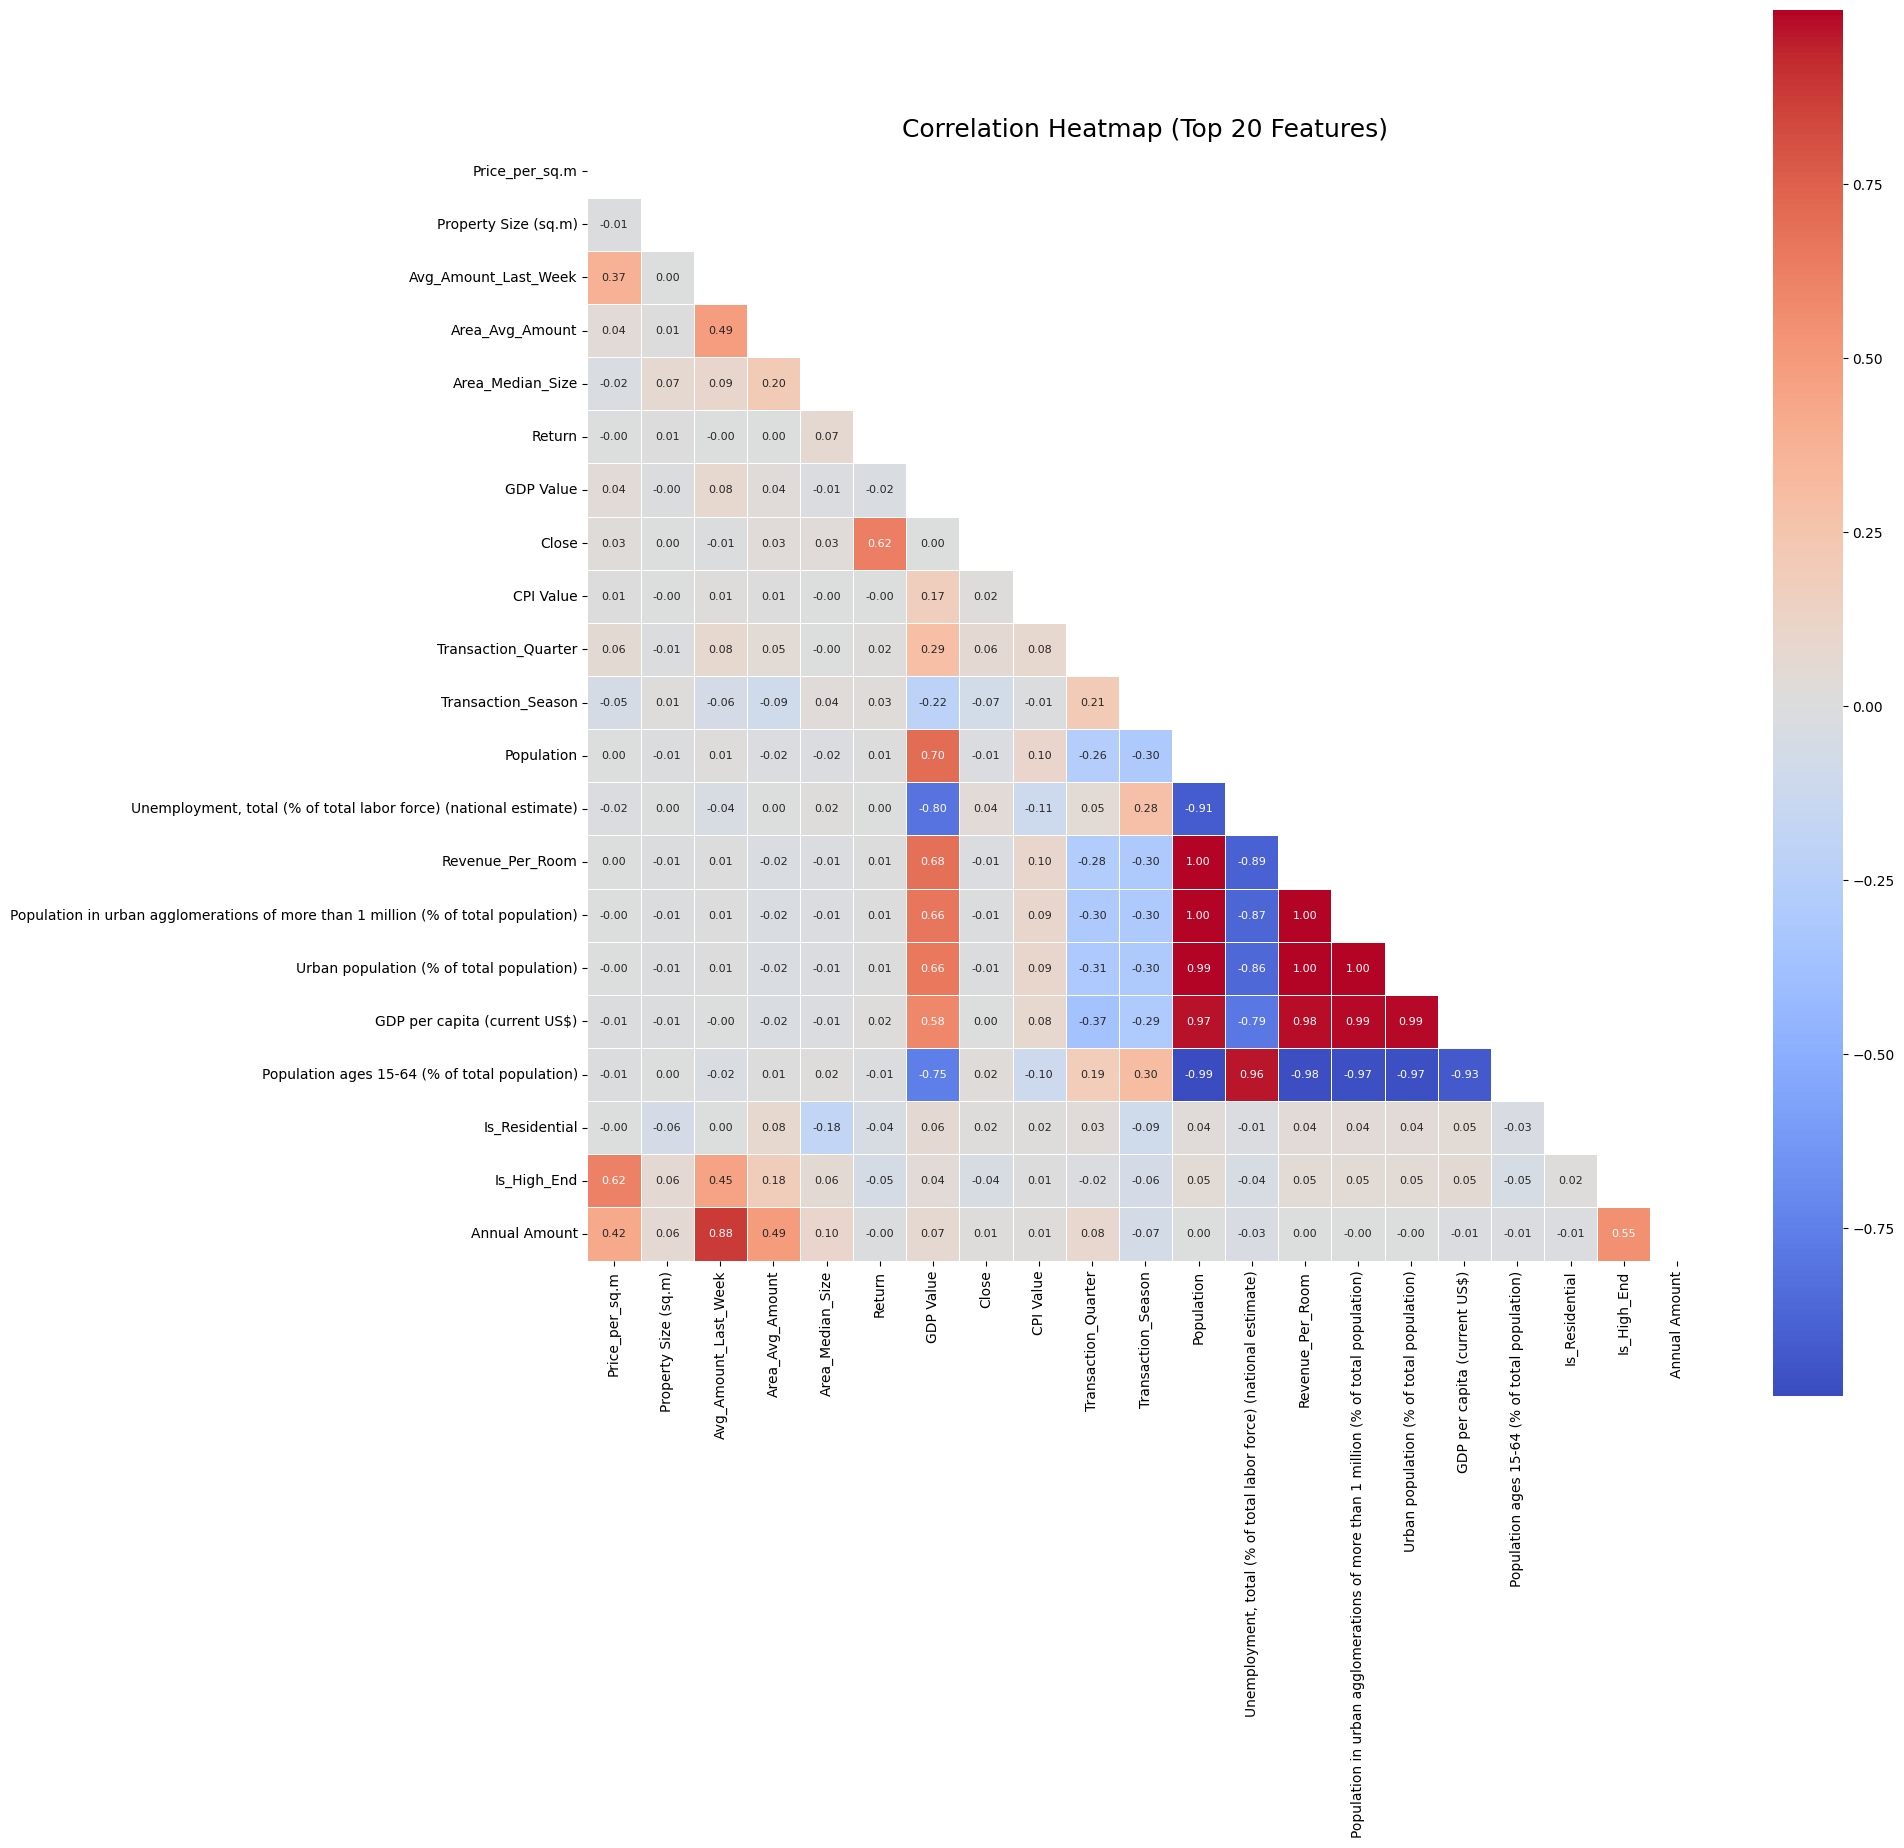

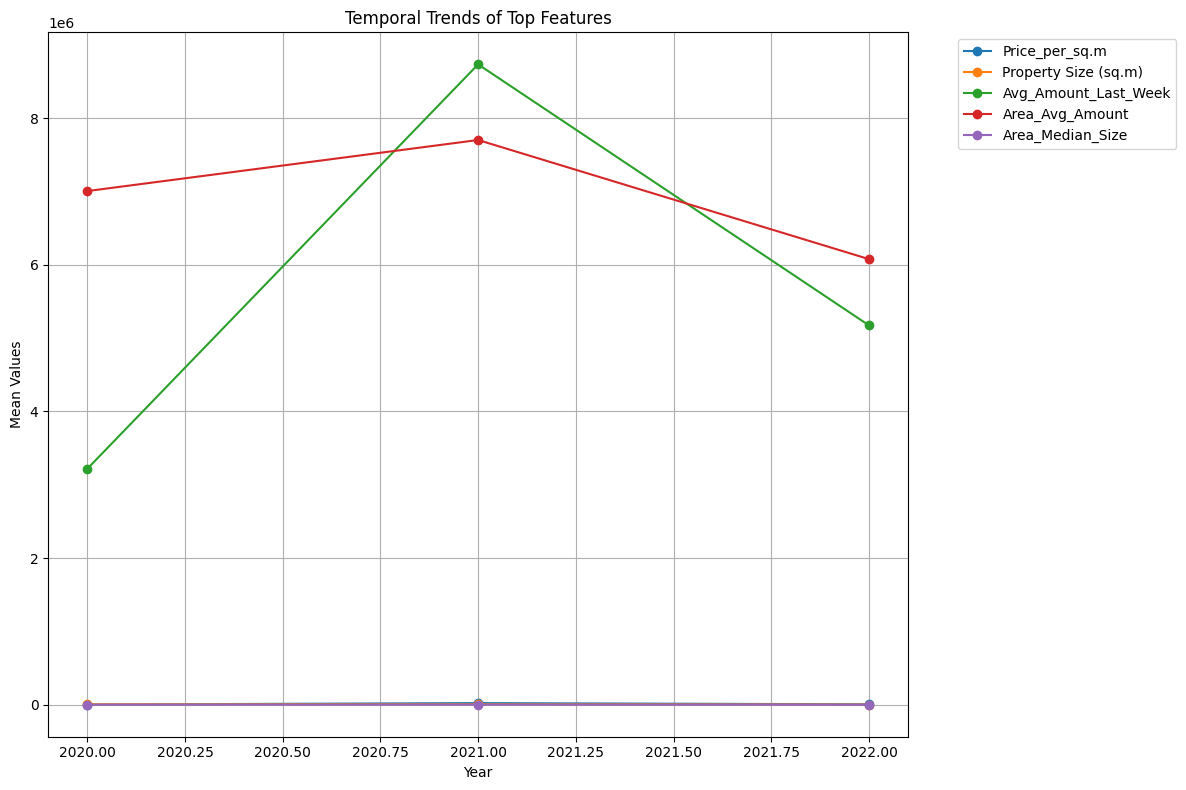

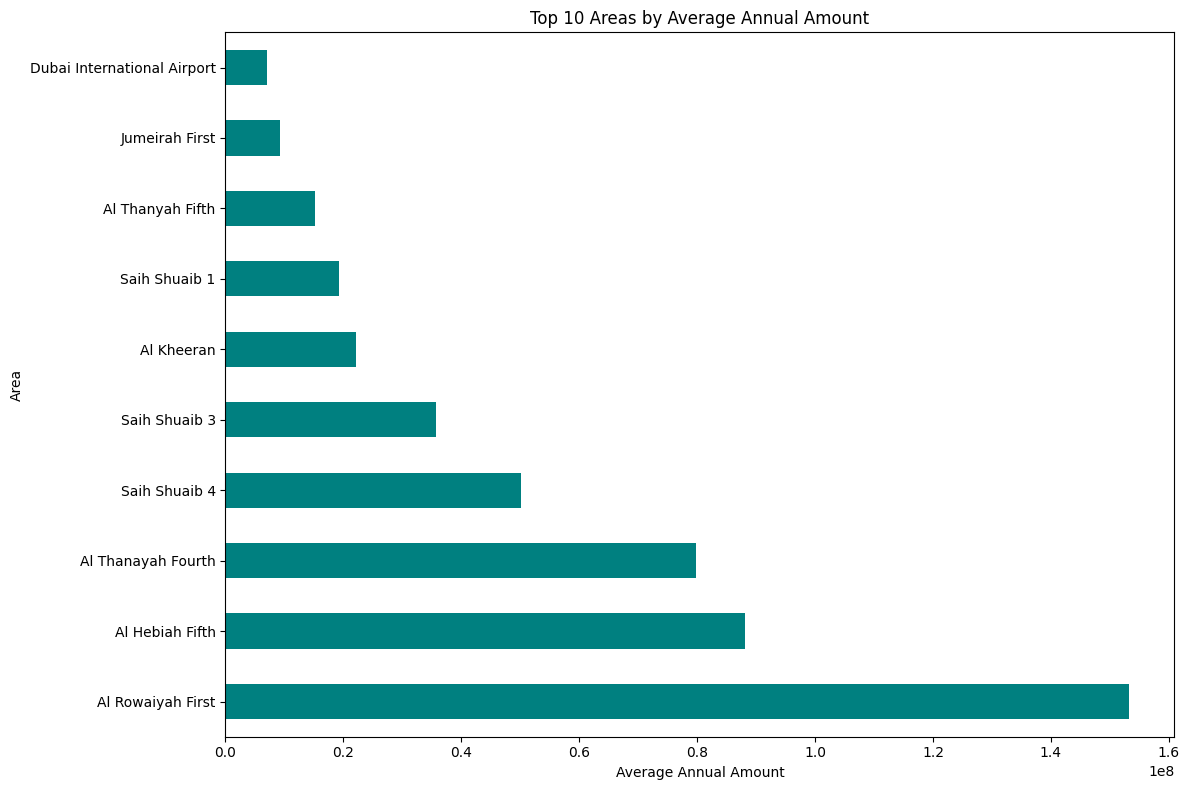

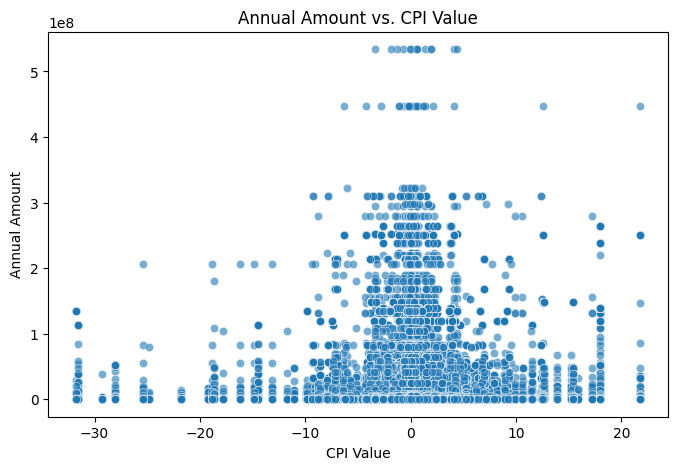

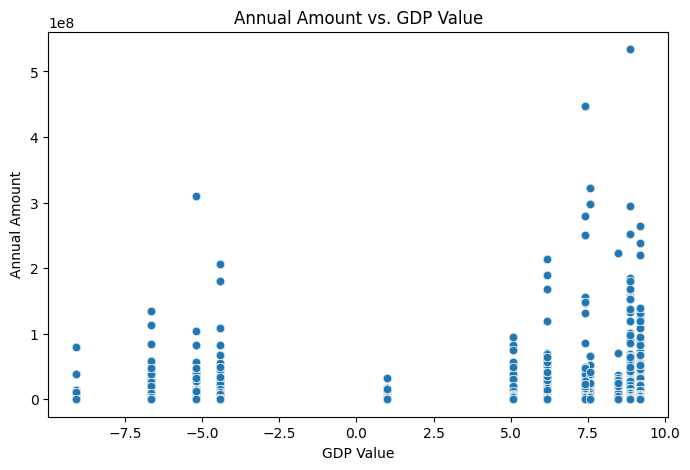

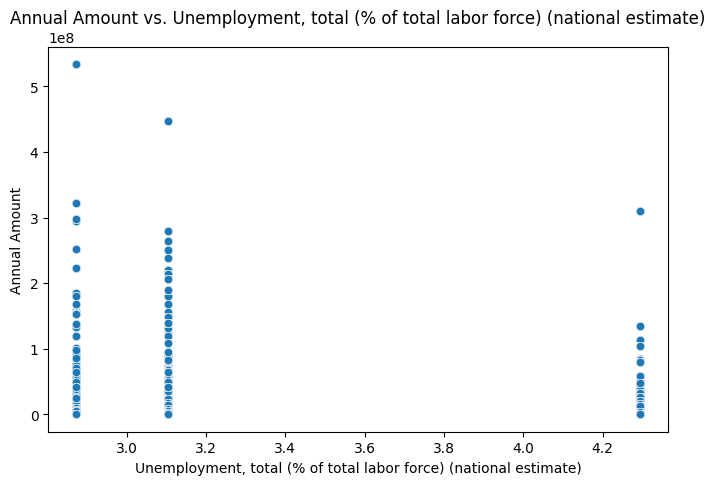

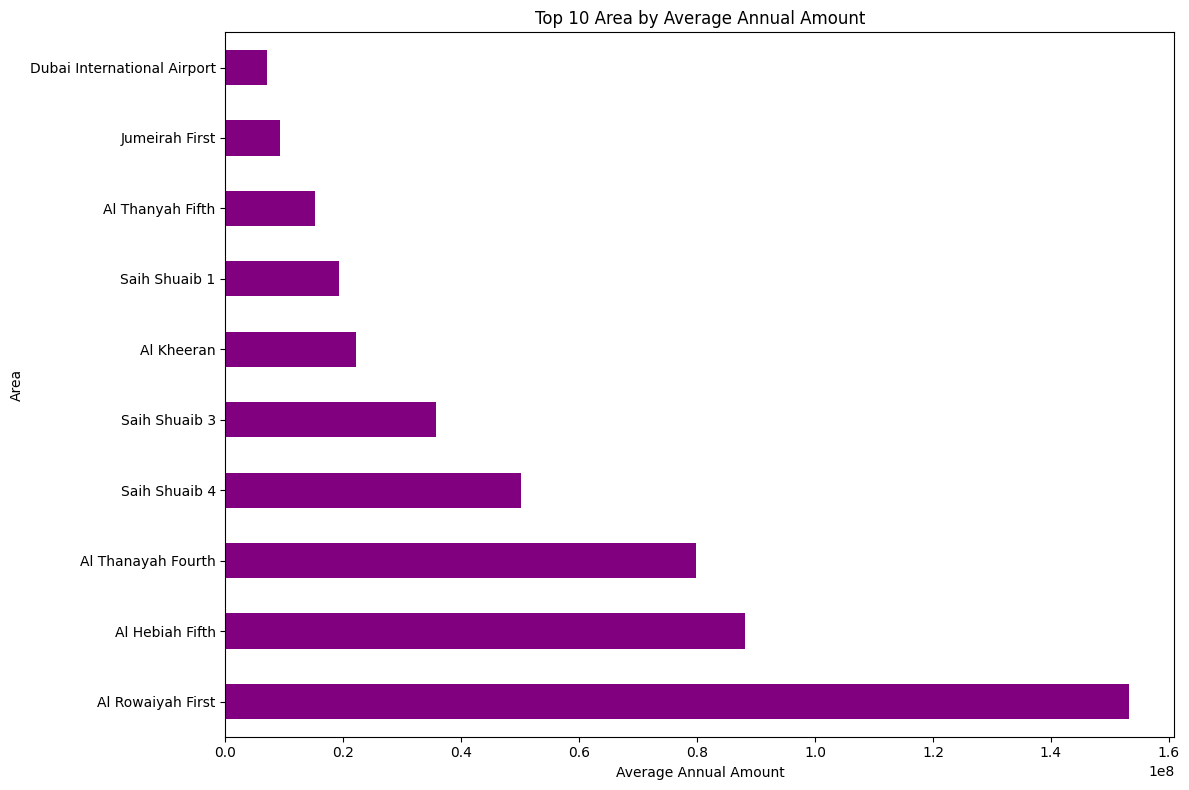

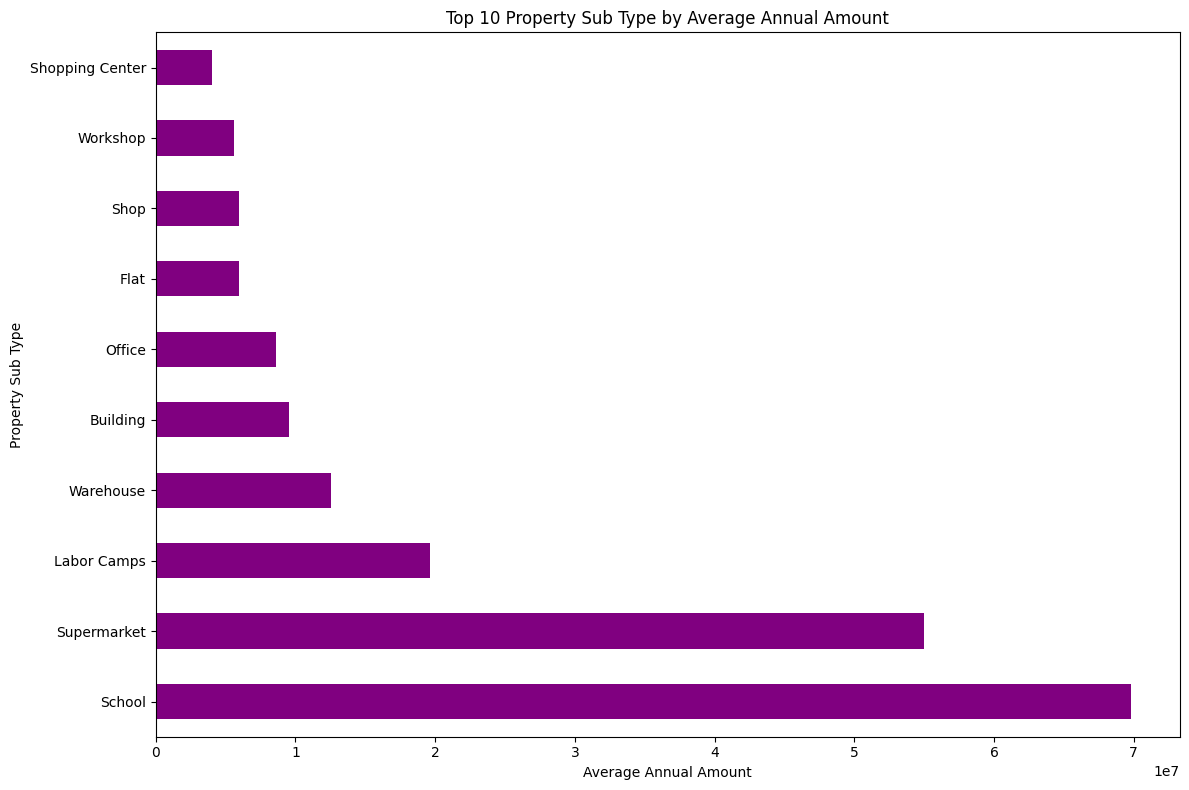

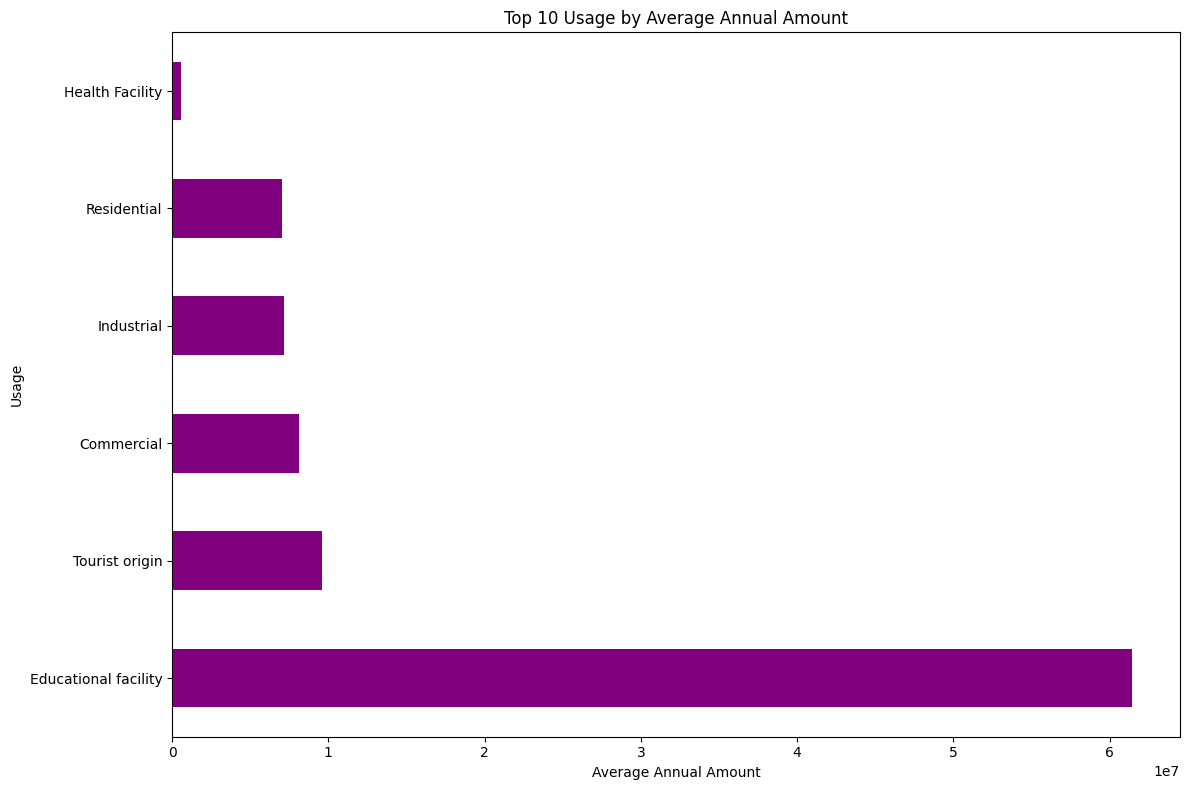

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\macro_rents_with_features_reduced.csv"

macro_rents_df = pd.read_csv(file_path)

output_dir = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\EDA2 RENTS+MACRODATA"
os.makedirs(output_dir, exist_ok=True)

if 'Property ID' in macro_rents_df.columns:
    macro_rents_df = macro_rents_df.drop(columns=['Property ID'])

macro_rents_df.replace([np.inf, -np.inf], np.nan, inplace=True)
macro_rents_df.dropna(inplace=True)

key_numeric_features = ['Annual Amount', 'Price_per_sq.m', 'CPI Value', 'GDP Value',
                        'Unemployment, total (% of total labor force) (national estimate)']
for feature in key_numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(macro_rents_df[feature], kde=True, bins=50, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.savefig(os.path.join(output_dir, f"distribution_{feature.replace(' ', '_')}.png"))
    plt.show()


target = 'Annual Amount'
features = macro_rents_df.select_dtypes(include=['float64', 'int64']).drop(columns=[target, 'Year', 'Days_Since_Registration'], errors='ignore')
X = features
y = macro_rents_df[target]

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

mi_scores_df.to_csv(os.path.join(output_dir, "mutual_information_scores.csv"), index=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df.head(20), palette='coolwarm')
plt.title("Top 20 Features by Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top_features_by_mutual_information.png"))
plt.show()

top_features = mi_scores_df['Feature'].head(20).tolist()
correlation_matrix = macro_rents_df[top_features + [target]].corr()

plt.figure(figsize=(18, 18))  
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8}  
)
plt.title("Correlation Heatmap (Top 20 Features)", fontsize=18)
plt.savefig(os.path.join(output_dir, "correlation_heatmap_top_20_square.png"))
plt.show()


macro_rents_df['Registration Date'] = pd.to_datetime(macro_rents_df['Registration Date'])

temporal_features = mi_scores_df['Feature'].head(5).tolist()  # Top 5 features
temporal_trends = macro_rents_df.groupby(macro_rents_df['Registration Date'].dt.year)[temporal_features].mean()

plt.figure(figsize=(12, 8))
for feature in temporal_trends.columns:
    plt.plot(temporal_trends.index, temporal_trends[feature], marker='o', label=feature)
plt.title("Temporal Trends of Top Features")
plt.xlabel("Year")
plt.ylabel("Mean Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "temporal_trends_adjusted.png"))
plt.show()


area_agg = macro_rents_df.groupby('Area')['Annual Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
area_agg.plot(kind='barh', color='teal')
plt.title("Top 10 Areas by Average Annual Amount")
plt.xlabel("Average Annual Amount")
plt.ylabel("Area")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "annual_amount_by_area.png"))
plt.show()


macro_features = ['CPI Value', 'GDP Value', 'Unemployment, total (% of total labor force) (national estimate)']
for feature in macro_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=macro_rents_df, x=feature, y='Annual Amount', alpha=0.6)
    plt.title(f"Annual Amount vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Annual Amount")
    plt.savefig(os.path.join(output_dir, f"influence_{feature.replace(' ', '_')}.png"))
    plt.show()


categorical_features = ['Area', 'Property Sub Type', 'Usage']
for feature in categorical_features:
    category_agg = macro_rents_df.groupby(feature)['Annual Amount'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    category_agg.plot(kind='barh', color='purple')
    plt.title(f"Top 10 {feature} by Average Annual Amount")
    plt.xlabel("Average Annual Amount")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"top_{feature}_by_annual_amount.png"))
    plt.show()


# Detailed Insights from Exploratory Data Analysis (EDA 2)

## Introduction

In this section, I analyze the trends, distributions, and relationships within the dataset to uncover insights into Dubai's real estate market. I focus on key features such as annual amount, price per square meter, macroeconomic factors, property characteristics, and usage types. Each visualization provides specific observations, contributing to a deeper understanding of the data.

---

## Temporal Trends of Top Features

### Observations:
- The **temporal trend analysis** shows how key features have changed over time. For example:
  - **`Avg_Amount_Last_Week`** and **`Area_Avg_Amount`** exhibit a significant increase in 2021, followed by a sharp decline in 2022. This aligns with macroeconomic trends like the recovery phase post-pandemic and subsequent market stabilization.
  - **`Property Size`** and **`Area_Median_Size`** remain relatively stable across the years, indicating minimal changes in average property sizes.
  - The fluctuations in **`Avg_Amount_Last_Week`** suggest that short-term pricing is highly sensitive to external factors, possibly macroeconomic variables or shifts in demand.

### Insights:
- 2021 appears to be a peak year for rental prices, possibly influenced by external factors like economic growth or increased demand for high-end properties. This warrants further investigation into external variables like GDP and CPI during this period.

---

## Distribution Analysis of Key Features

### 1. Annual Amount Distribution
- **Observations:**
  - The distribution is heavily skewed to the right, with the majority of properties concentrated at lower annual amounts.
  - A small number of properties have extraordinarily high annual amounts, which significantly increase the mean value.

- **Insights:**
  - The presence of extreme values necessitates transformations (e.g., log or Box-Cox) for model training. High-value outliers may correspond to luxury properties or large-scale commercial units.

### 2. Price per Square Meter Distribution
- **Observations:**
  - Similar to annual amount, this feature is right-skewed. Most properties have relatively low prices per square meter, while a small fraction command premium rates.
  - This pattern reflects market segmentation between affordable and high-end properties.

- **Insights:**
  - The segmentation highlights investment opportunities in premium areas. Adjustments to reduce skewness during modeling will improve predictive accuracy.

### 3. CPI and GDP Value Distributions
- **CPI Value:**
  - The data clusters around zero, indicating that most observations are near neutral inflation/deflation levels.
  - Extreme negative or positive CPI values are rare, suggesting that Dubai's market has experienced relatively stable inflation over the analyzed period.

- **GDP Value:**
  - The bimodal distribution reflects periods of economic contraction and expansion. Peaks at higher GDP values likely correspond to economic booms impacting real estate positively.

- **Insights:**
  - Macroeconomic stability appears to influence real estate pricing and rental behavior. GDP trends may correlate with periods of increased demand or higher rental amounts.

### 4. Unemployment Distribution
- **Observations:**
  - The distribution has distinct spikes at specific percentages, indicating well-defined employment thresholds affecting the market.
  - Lower unemployment is generally associated with higher rental activity, as employment drives demand for housing.

- **Insights:**
  - Employment stability in Dubai has a measurable impact on real estate demand, particularly in the residential sector.

---

## Top 10 Areas by Average Annual Amount

### Observations:
- **Al Rowaiyah First** dominates with the highest average annual amount, followed by **Al Hebiah Fifth** and **Al Thanyah Fourth**.
- These areas represent hotspots for high-value properties, with significant rental yields.

### Insights:
- Investment in these neighborhoods could yield high returns. Further analysis of property subtypes in these areas may provide specific recommendations for investors.

---

## Top 10 Property Subtypes by Average Annual Amount

### Observations:
- **Schools** and **supermarkets** lead in property subtypes with the highest average annual amounts.
- Essential service properties (e.g., educational and retail facilities) consistently fetch higher rents compared to other subtypes like offices or residential units.

### Insights:
- Properties tied to public services or essential goods are highly valued in the Dubai market. This suggests an opportunity for investors to focus on these subtypes for long-term rental income.

---

## Top 10 Usage Types by Average Annual Amount

### Observations:
- **Educational facilities** far exceed other usage types in average annual rent, followed by **tourist origin** and **commercial** properties.
- Residential and industrial properties, while stable, lag behind in terms of rental yields.

### Insights:
- Educational and tourist-focused properties dominate due to consistent demand and high utility. These usage types may offer resilient investment opportunities even in fluctuating markets.

---

## Annual Amount vs. Macroeconomic Indicators

### 1. CPI Value
- **Observations:**
  - Annual amounts cluster around neutral CPI values, suggesting minimal inflationary impact on rents.
  - Extreme CPI values (positive or negative) show less variability in rents, indicating a stronger resistance of premium properties to inflation changes.

- **Insights:**
  - Stable inflation correlates with steady rental amounts. Investors should monitor CPI trends to predict market shifts.

### 2. GDP Value
- **Observations:**
  - Higher GDP values correlate with increased variability in annual amounts, reflecting greater opportunities for premium property segments during economic booms.

- **Insights:**
  - GDP growth is a strong indicator of market potential. Higher GDP periods should guide investment timing.

### 3. Unemployment
- **Observations:**
  - Higher annual rents are concentrated in regions with lower unemployment, confirming that employment drives demand for housing and real estate investment.

- **Insights:**
  - Investors should target areas with strong employment statistics for consistent rental yields.

---

## Mutual Information Ranking of Features

### Observations:
- **Top Predictors:**
  - `Price_per_sq.m`, `Property Size`, and `Avg_Amount_Last_Week` rank as the most important features for predicting rental or sale prices.
  - Macroeconomic features like `GDP Value` and `CPI Value` also show significant predictive power, albeit indirectly.

### Insights:
- Focusing on these high-ranking features can significantly improve model performance. Macroeconomic factors, while secondary, provide valuable context for long-term predictions.

---

## Correlation Heatmap of Top 20 Features

### Observations:
- **Key Relationships:**
  - Strong correlations exist between `Price_per_sq.m`, `Property Size`, and `Annual Amount`.
  - `Avg_Amount_Last_Week` and `Area_Avg_Amount` exhibit moderate correlations, reflecting temporal and spatial dependencies in pricing.

### Insights:
- High correlations between pricing and property size emphasize the importance of these variables in predictive models. Temporal features like `Avg_Amount_Last_Week` add additional value for forecasting.

---

## Final Thoughts

This EDA reveals key trends and relationships in the Dubai real estate market:
1. High-value areas like Al Rowaiyah First and high-demand property types like schools offer lucrative investment opportunities.
2. Macroeconomic stability and growth (e.g., GDP and CPI trends) significantly influence market behavior, providing guidance for long-term investment planning.
3. Focusing on top predictors like `Price_per_sq.m` and `Property Size` will improve model performance while incorporating external factors like GDP and unemployment for deeper insights.

These insights will inform the development of robust predictive models and strategic recommendations for real estate investments in Dubai.


# TRANSACTION FILE 

In [2]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_processed.csv"
transactions = pd.read_csv(file_path)

columns_to_drop = [
    'Transaction Date',       
    'Nearest Metro_Missing',  
    'Nearest Mall_Missing',   
    'Nearest Landmark_Missing',  
    'Type_land',             
]

transactions_cleaned = transactions.drop(columns=columns_to_drop)

output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_final.csv"
transactions_cleaned.to_csv(output_file_path, index=False)

print(f"Columns dropped: {columns_to_drop}")
print(f"Remaining columns: {transactions_cleaned.columns}")
print(f"Cleaned dataset saved to: {output_file_path}")




C:\Users\User\AppData\Local\Temp\ipykernel_18216\1599271429.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv(file_path)


Columns dropped: ['Transaction Date', 'Nearest Metro_Missing', 'Nearest Mall_Missing', 'Nearest Landmark_Missing', 'Type_land', 'Type_unit']
Remaining columns: Index(['Property ID', 'Area', 'Amount', 'Transaction Size (sq.m)',
       'Property Size (sq.m)', 'Property Type', 'Property Sub Type', 'Room(s)',
       'Usage', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark',
       'No. of Buyer', 'No. of Seller', 'Transaction Year',
       'Transaction Month', 'Size Consistency', 'Price_per_sq.m',
       'Size_Difference', 'Transaction_Quarter', 'Transaction_Season',
       'Days_Since_Transaction', 'Is_Hotspot_Metro', 'Is_Residential',
       'Area_Avg_Amount', 'Area_Median_Size', 'Room(s)_Numeric',
       'Amount_per_Room', 'Size_to_Amount', 'Is_High_End',
       'Avg_Amount_Last_Week', 'Avg_Amount_Last_Month'],
      dtype='object')
Cleaned dataset saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_final.csv


In [6]:
import pandas as pd
import numpy as np

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_improved.csv"
transactions_cleaned = pd.read_csv(file_path)

transactions_cleaned['Transaction Size (sq.m)'] = transactions_cleaned.groupby(
    ['Property Type', 'Area']
)['Transaction Size (sq.m)'].transform(lambda x: x.fillna(x.median()))

transactions_cleaned['Property Size (sq.m)'] = transactions_cleaned.groupby(
    ['Property Type', 'Area']
)['Property Size (sq.m)'].transform(lambda x: x.fillna(x.median()))

transactions_cleaned['Nearest Metro'] = transactions_cleaned['Nearest Metro'].fillna('Unknown')
transactions_cleaned['Nearest Mall'] = transactions_cleaned['Nearest Mall'].fillna('Unknown')
transactions_cleaned['Nearest Landmark'] = transactions_cleaned['Nearest Landmark'].fillna('Unknown')


transactions_cleaned['No. of Buyer'] = transactions_cleaned['No. of Buyer'].fillna(0)
transactions_cleaned['No. of Seller'] = transactions_cleaned['No. of Seller'].fillna(0)

transactions_cleaned['Price_per_sq.m'] = transactions_cleaned['Amount'] / transactions_cleaned['Transaction Size (sq.m)']
transactions_cleaned['Size_Difference'] = transactions_cleaned['Property Size (sq.m)'] - transactions_cleaned['Transaction Size (sq.m)']

transactions_cleaned['Amount_per_Room'] = transactions_cleaned.apply(
    lambda row: row['Amount'] / row['Room(s)_Numeric'] if row['Room(s)_Numeric'] > 0 else None,
    axis=1
)

transactions_cleaned['Size_to_Amount'] = transactions_cleaned['Property Size (sq.m)'] / transactions_cleaned['Amount']
transactions_cleaned.loc[transactions_cleaned['Amount'] == 0, 'Size_to_Amount'] = None

output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_no_missing.csv"
transactions_cleaned.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved to: {output_file_path}")




C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

Cleaned dataset saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_no_missing.csv


In [9]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_no_missing.csv"
transactions_cleaned = pd.read_csv(file_path)

transactions_cleaned.drop(columns=['Amount_per_Room'], inplace=True)

transactions_cleaned['Transaction Size (sq.m)'] = transactions_cleaned.groupby(
    ['Property Type', 'Area']
)['Transaction Size (sq.m)'].transform(lambda x: x.fillna(x.median()))

transactions_cleaned['Price_per_sq.m'] = transactions_cleaned['Amount'] / transactions_cleaned['Transaction Size (sq.m)']
transactions_cleaned.loc[transactions_cleaned['Transaction Size (sq.m)'] == 0, 'Price_per_sq.m'] = None

transactions_cleaned['Size_Difference'] = transactions_cleaned['Property Size (sq.m)'] - transactions_cleaned['Transaction Size (sq.m)']

transactions_cleaned['Nearest Metro'] = transactions_cleaned['Nearest Metro'].fillna('Unknown')
transactions_cleaned['Nearest Mall'] = transactions_cleaned['Nearest Mall'].fillna('Unknown')
transactions_cleaned['Nearest Landmark'] = transactions_cleaned['Nearest Landmark'].fillna('Unknown')

transactions_cleaned['No. of Buyer'] = transactions_cleaned['No. of Buyer'].fillna(0)
transactions_cleaned['No. of Seller'] = transactions_cleaned['No. of Seller'].fillna(0)

transactions_cleaned['Size_to_Amount'] = transactions_cleaned['Property Size (sq.m)'] / transactions_cleaned['Amount']
transactions_cleaned.loc[transactions_cleaned['Amount'] == 0, 'Size_to_Amount'] = None

output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_no_missing.csv"
transactions_cleaned.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to: {output_file_path}")


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

Updated dataset saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_no_missing.csv


Performing Distribution Analysis...


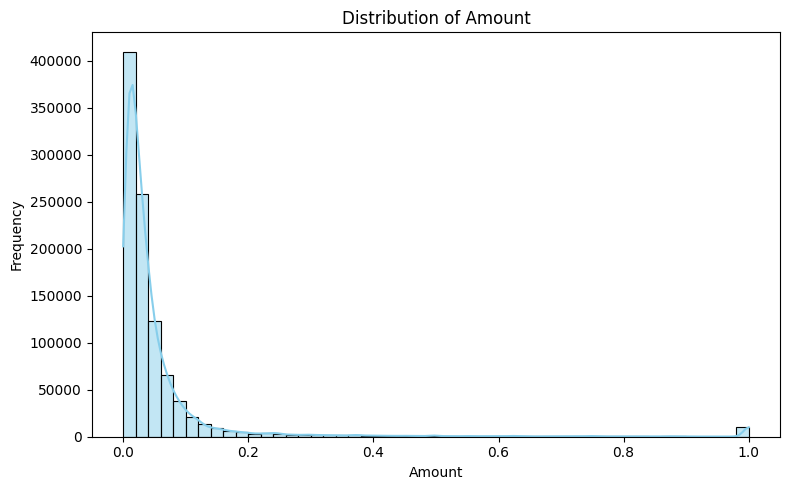

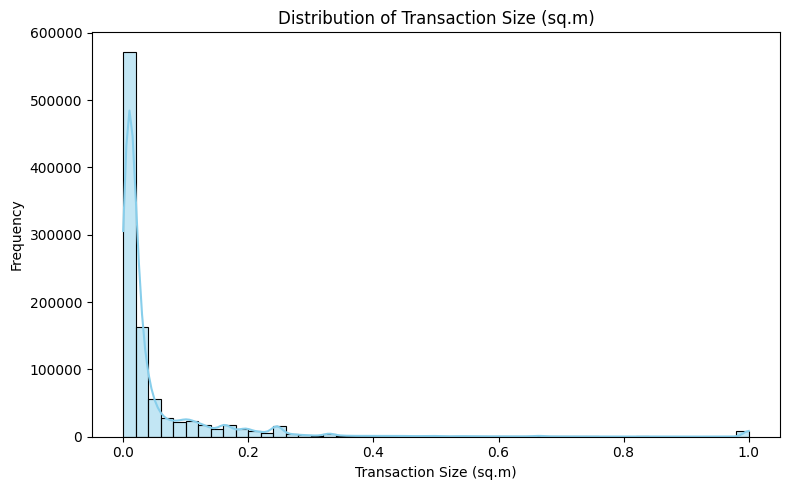

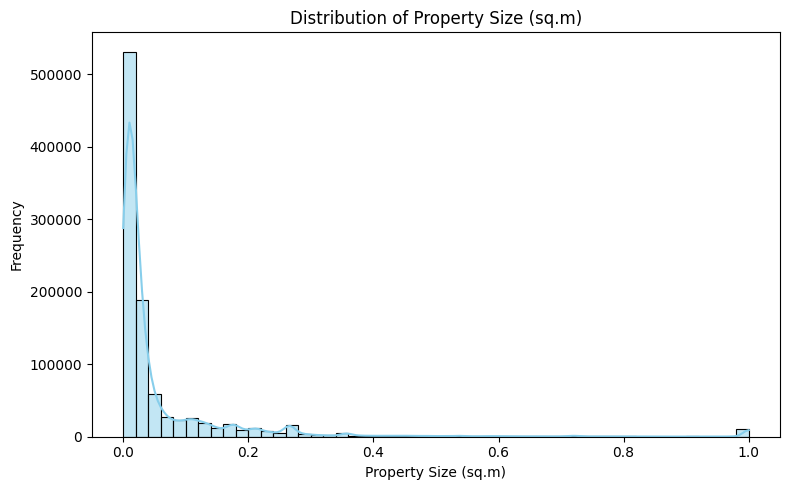

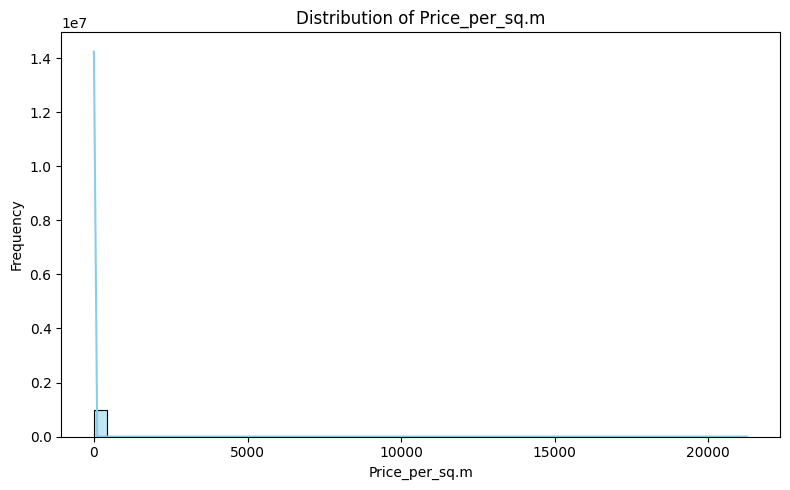

Performing Temporal Analysis...


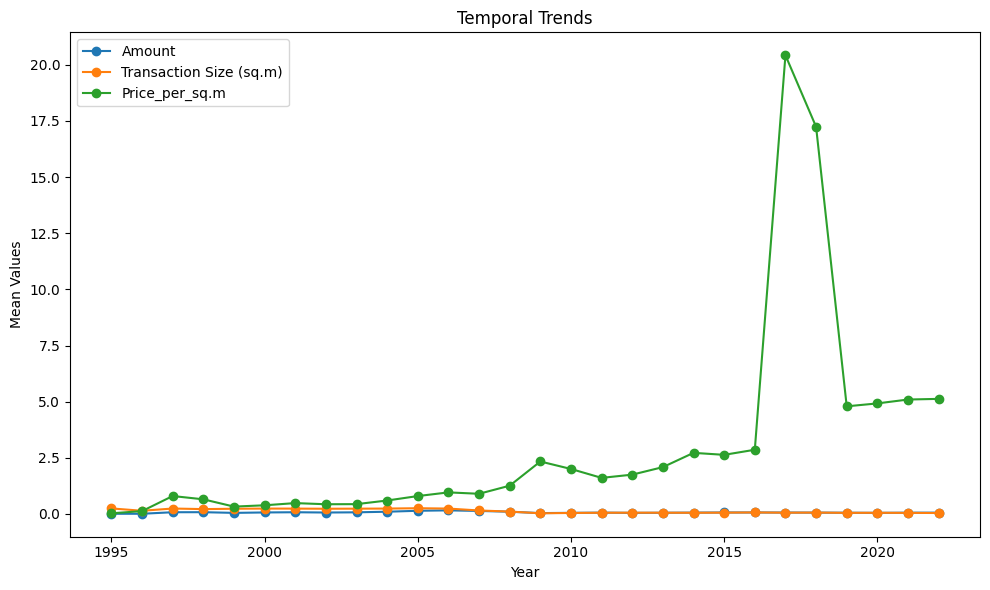

Performing Categorical Analysis...


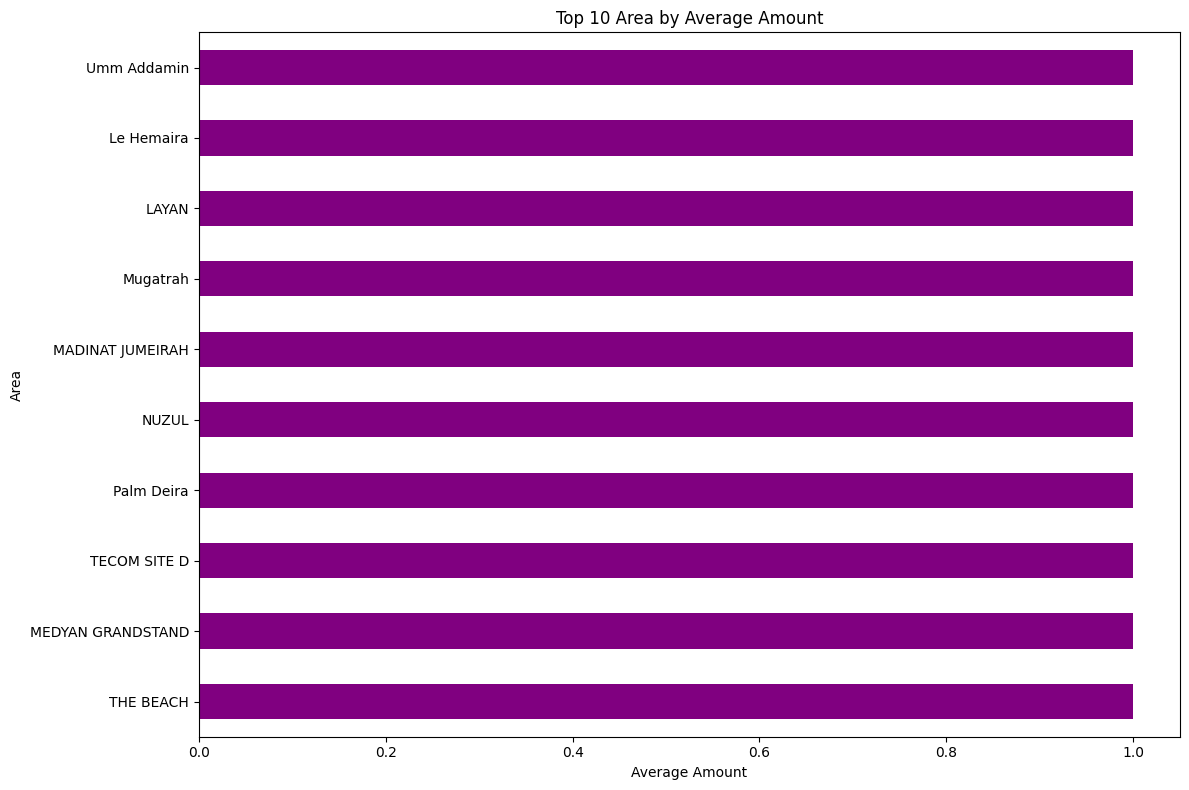

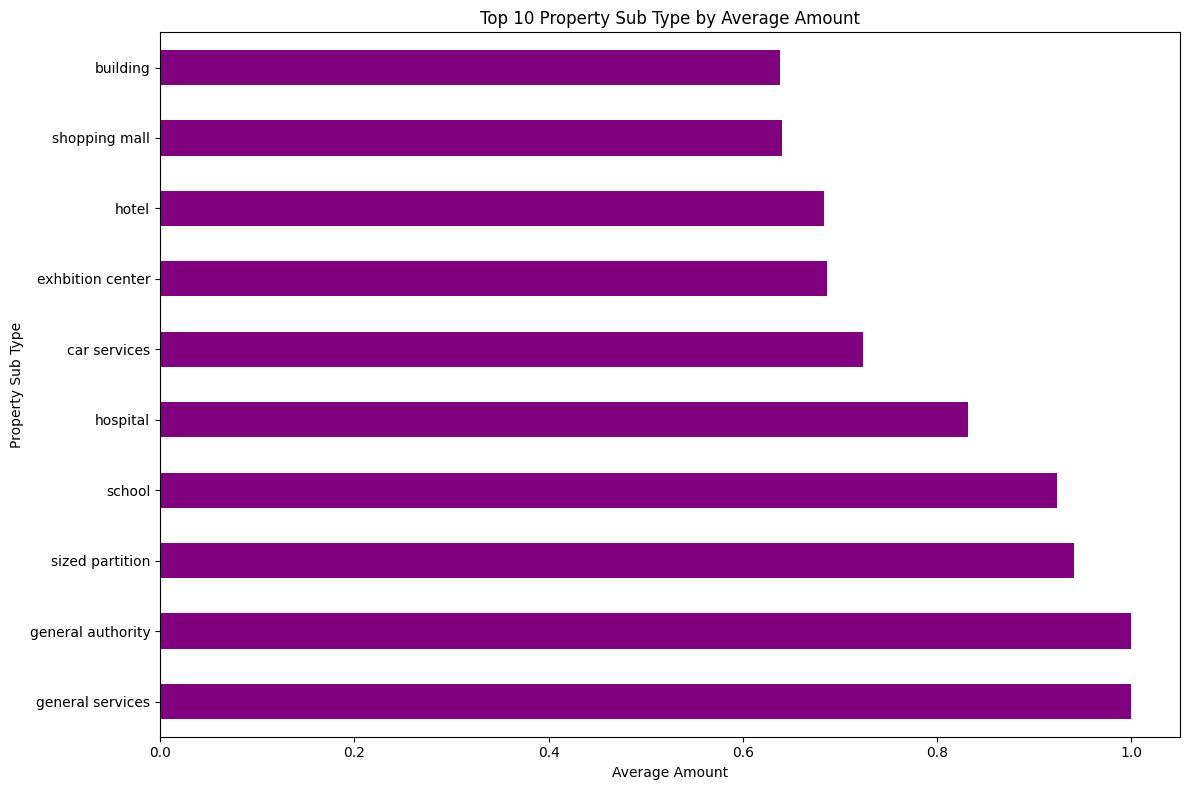

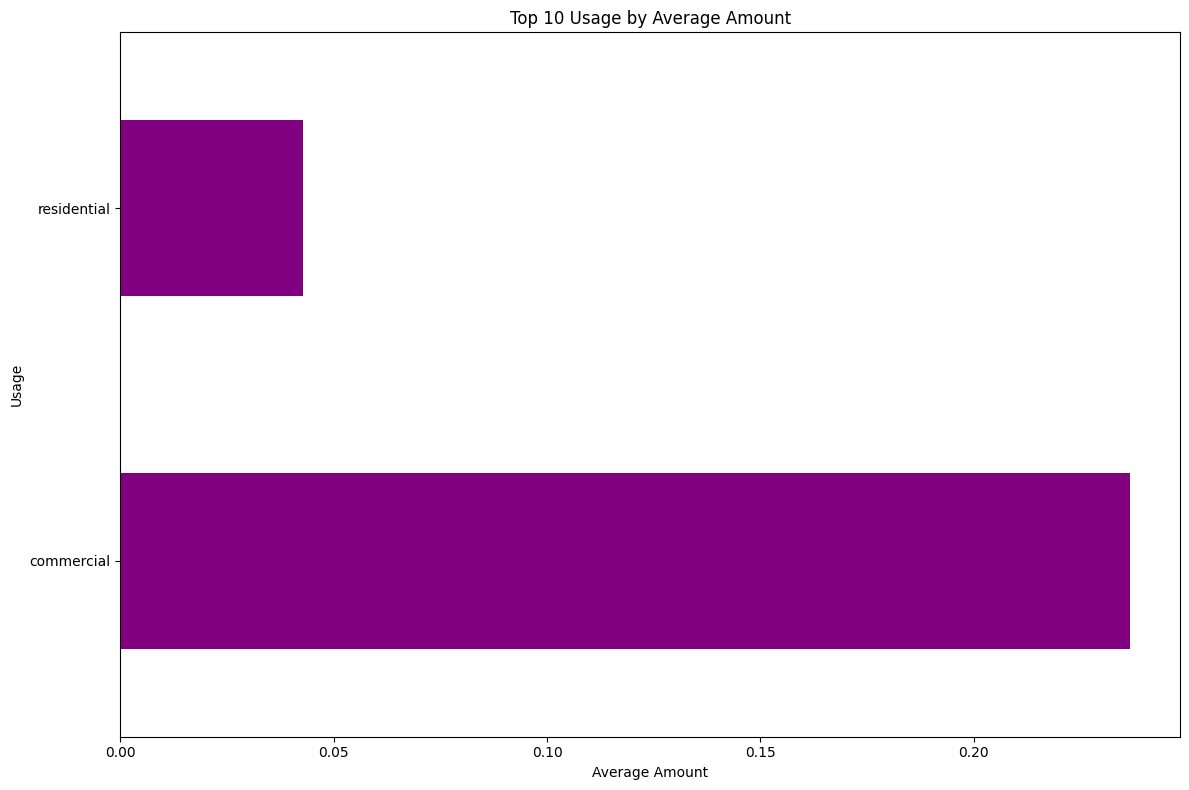

Performing Correlation Analysis...


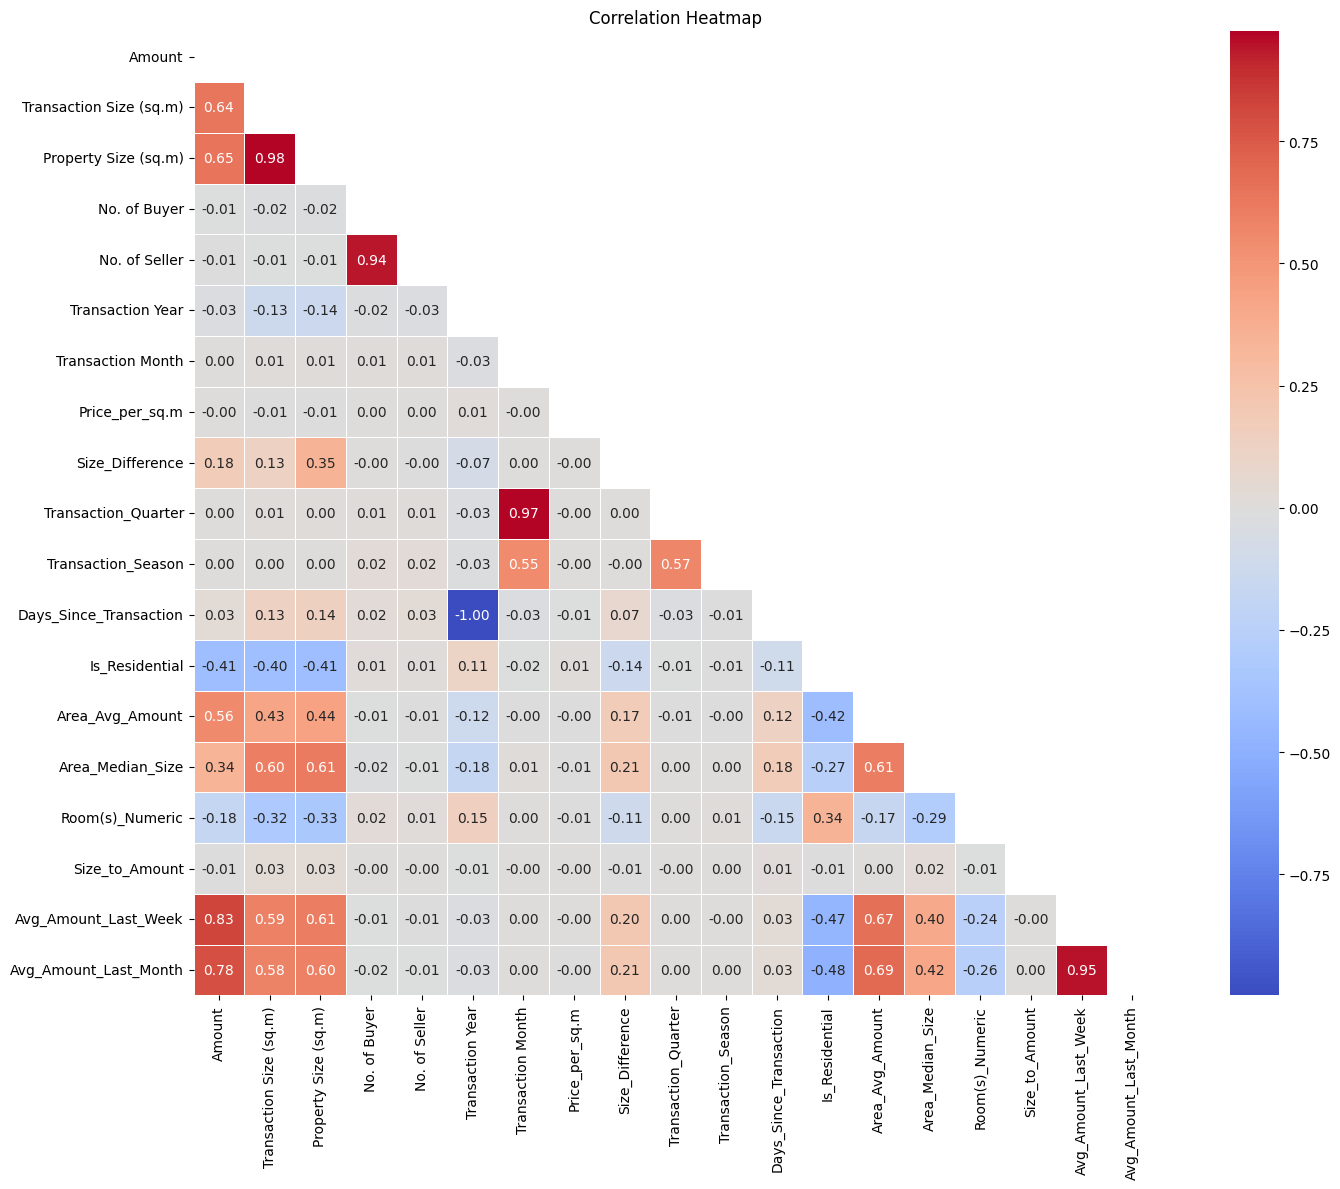

Performing Hotspot Analysis...


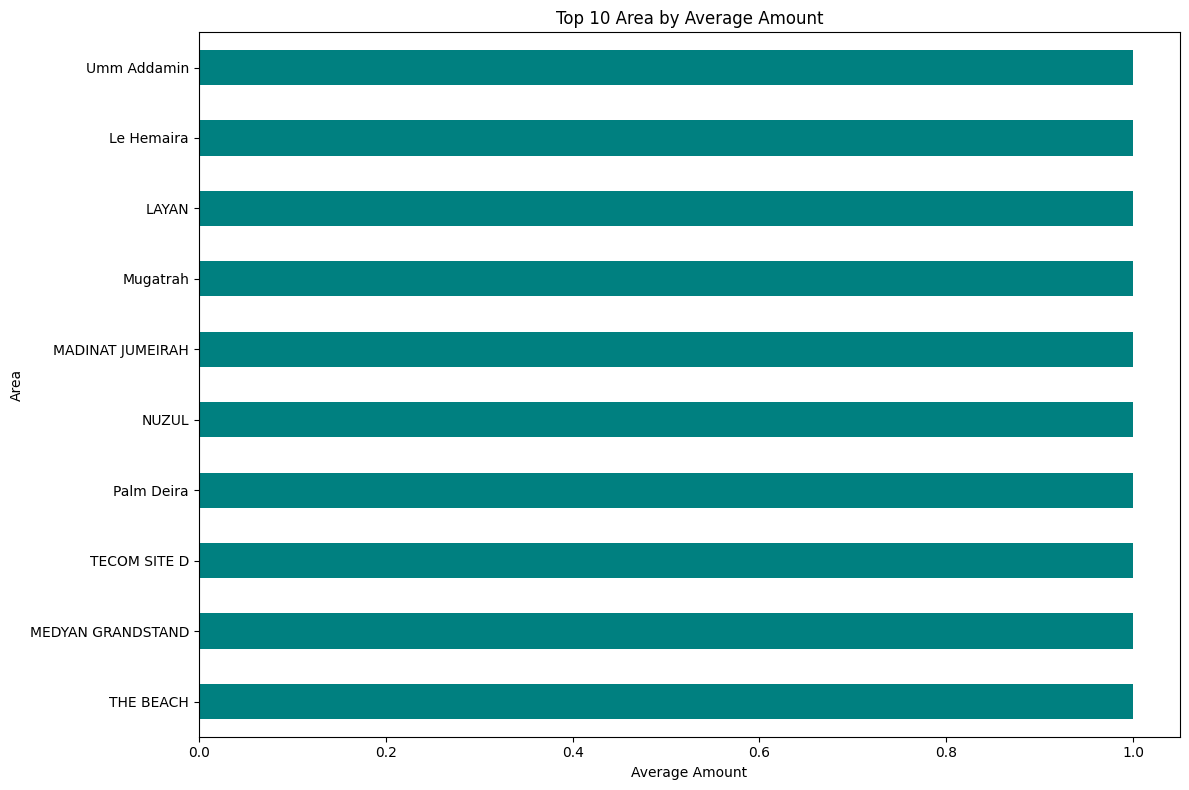

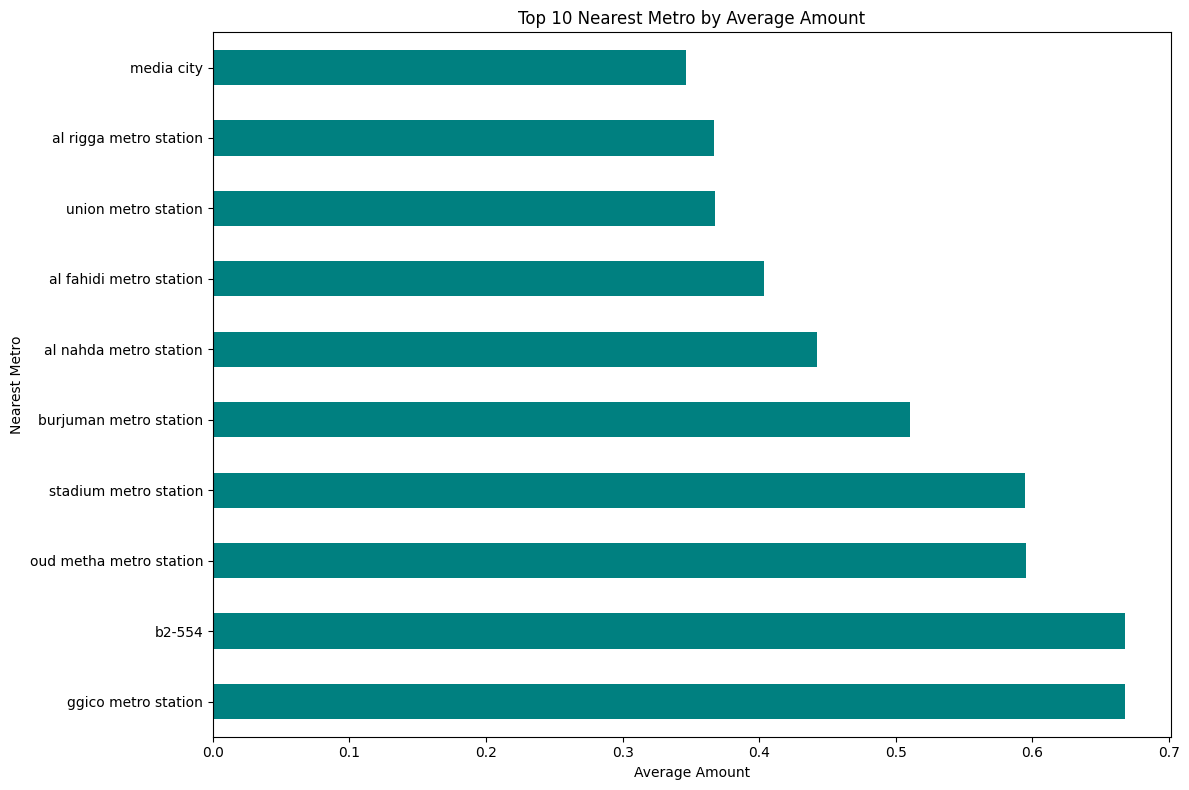

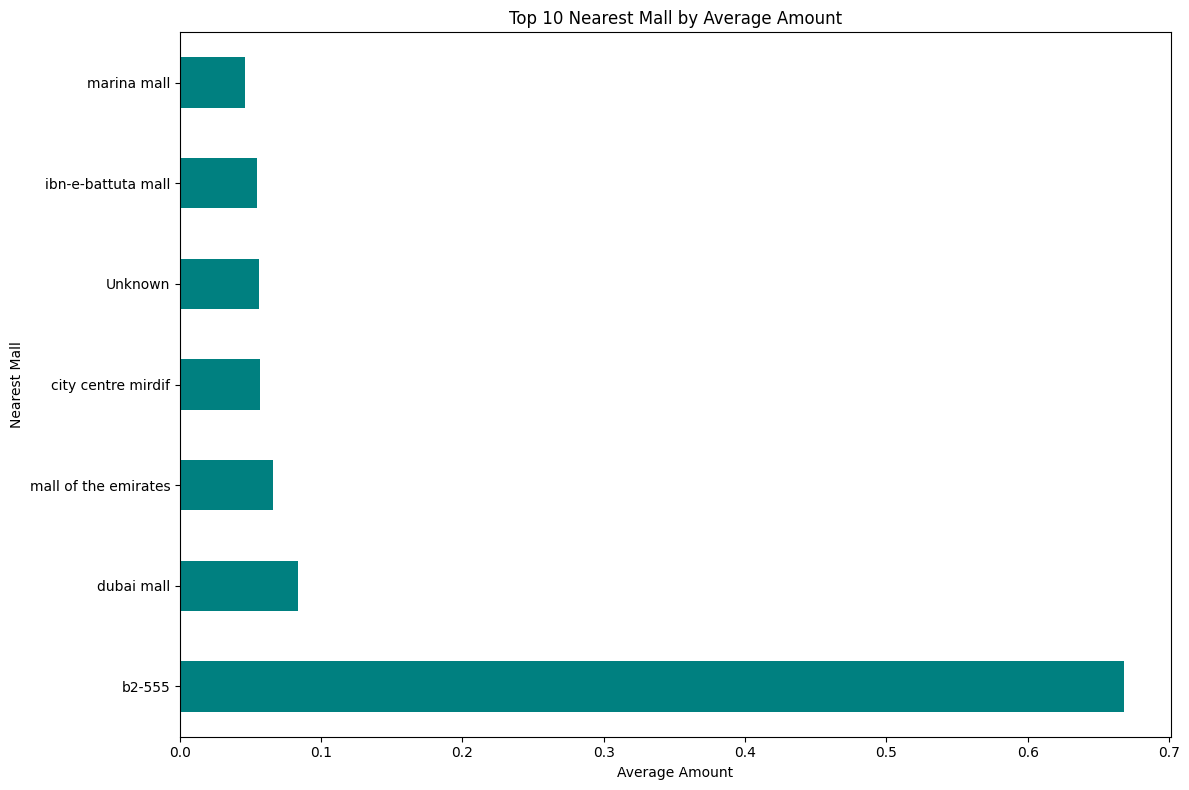

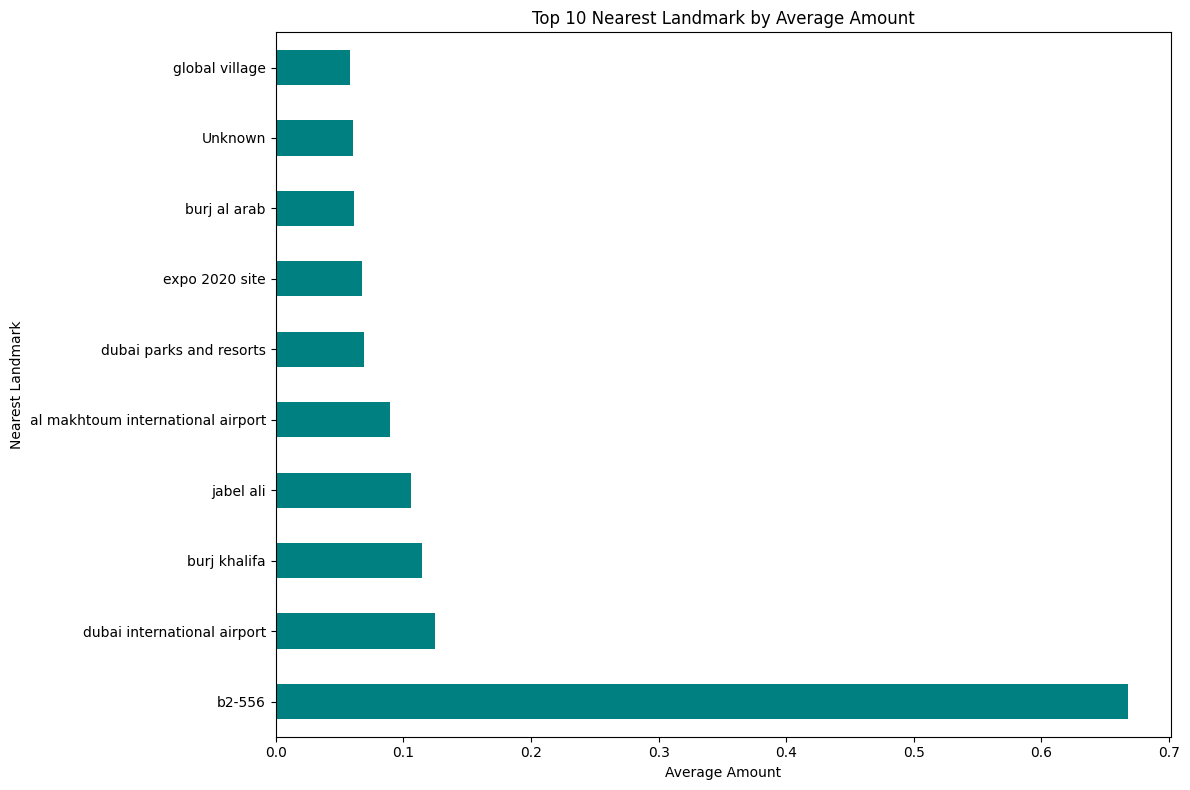

Performing Buyer-Seller Analysis...


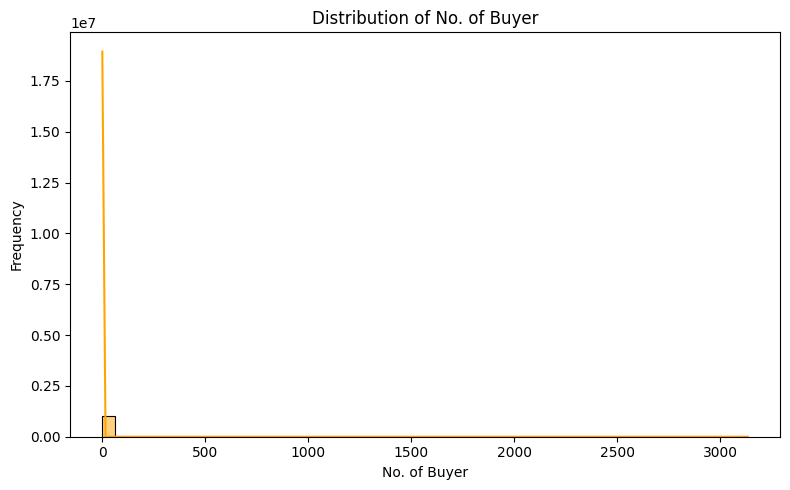

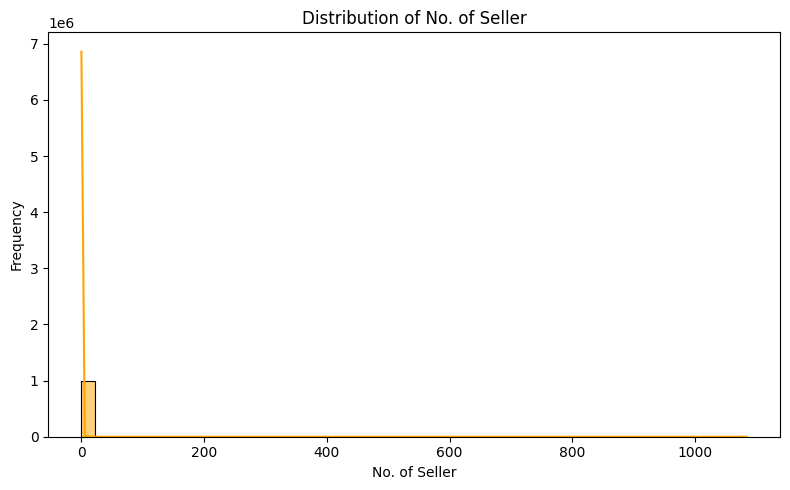

Analyzing Size-to-Amount Relationship...


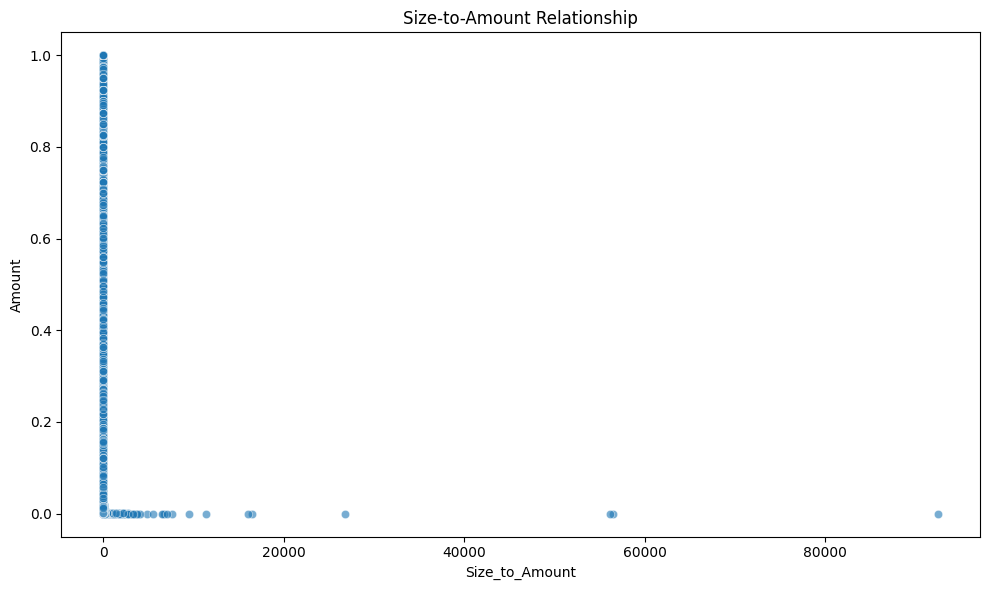

Calculating Feature Importance...
Found missing values in features. Handling missing values...


C:\Users\User\AppData\Local\Temp\ipykernel_19592\154206068.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_scores_df.head(20), x='Mutual Information', y='Feature', palette='viridis')


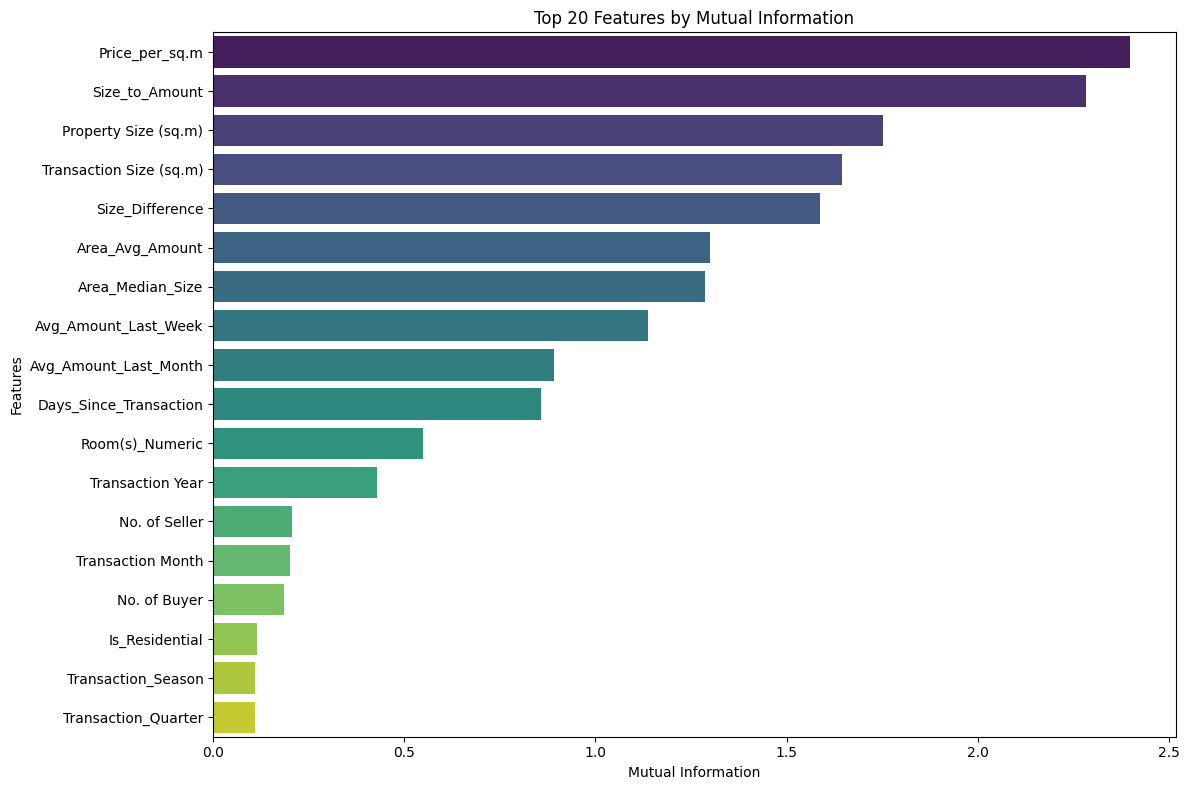

EDA Completed.


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_no_missing.csv"

transactions_df = pd.read_csv(file_path)

if 'Amount_per_Room' in transactions_df.columns:
    transactions_df.drop(columns=['Amount_per_Room'], inplace=True)

output_dir = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\EDA2 TRANSACTION"
os.makedirs(output_dir, exist_ok=True)

print("Performing Distribution Analysis...")
key_numeric_features = [
    'Amount', 'Transaction Size (sq.m)', 
    'Property Size (sq.m)', 'Price_per_sq.m'
]
for feature in key_numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(transactions_df[feature], kde=True, bins=50, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"distribution_{feature.replace(' ', '_')}.png"))
    plt.show()

print("Performing Temporal Analysis...")
temporal_features = ['Amount', 'Transaction Size (sq.m)', 'Price_per_sq.m']
temporal_trends = transactions_df.groupby('Transaction Year')[temporal_features].mean()

plt.figure(figsize=(10, 6))
for feature in temporal_features:
    if feature in temporal_trends.columns:
        plt.plot(temporal_trends.index, temporal_trends[feature], marker='o', label=feature)
plt.title("Temporal Trends")
plt.xlabel("Year")
plt.ylabel("Mean Values")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "temporal_trends.png"))
plt.show()

print("Performing Categorical Analysis...")
categorical_features = ['Area', 'Property Sub Type', 'Usage']
for feature in categorical_features:
    category_agg = transactions_df.groupby(feature)['Amount'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    category_agg.plot(kind='barh', color='purple')
    plt.title(f"Top 10 {feature} by Average Amount")
    plt.xlabel("Average Amount")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"top_{feature}_by_amount.png"))
    plt.show()

print("Performing Correlation Analysis...")
numeric_cols = transactions_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = transactions_df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "correlation_heatmap.png"))
plt.show()

print("Performing Hotspot Analysis...")
hotspot_features = ['Area', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark']
for feature in hotspot_features:
    hotspot_agg = transactions_df.groupby(feature)['Amount'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    hotspot_agg.plot(kind='barh', color='teal')
    plt.title(f"Top 10 {feature} by Average Amount")
    plt.xlabel("Average Amount")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"hotspot_{feature}_by_amount.png"))
    plt.show()

# --- 6. Buyer-Seller Analysis ---
print("Performing Buyer-Seller Analysis...")
buyer_seller_features = ['No. of Buyer', 'No. of Seller']
for feature in buyer_seller_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(transactions_df[feature], kde=True, bins=50, color='orange')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"distribution_{feature.replace(' ', '_')}.png"))
    plt.show()

print("Analyzing Size-to-Amount Relationship...")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions_df, x='Size_to_Amount', y='Amount', alpha=0.6)
plt.title("Size-to-Amount Relationship")
plt.xlabel("Size_to_Amount")
plt.ylabel("Amount")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "size_to_amount_relationship.png"))
plt.show()

print("Calculating Feature Importance...")
X = transactions_df[numeric_cols].drop(columns=['Amount'], errors='ignore')
y = transactions_df['Amount']

if X.isnull().any().any():
    print("Found missing values in features. Handling missing values...")
    X = X.fillna(X.mean())  

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores}).sort_values(by='Mutual Information', ascending=False)

mi_scores_df.to_csv(os.path.join(output_dir, "mutual_information_scores.csv"), index=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=mi_scores_df.head(20), x='Mutual Information', y='Feature', palette='viridis')
plt.title("Top 20 Features by Mutual Information")
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top_features_by_mutual_information.png"))
plt.show()

print("EDA Completed.")


Detailed Insights from EDA2 Graphics
1. Distribution of Transaction Amounts
Insight:
When analyzing the distribution of transaction amounts, I observed that the data is highly skewed towards lower values, with most transactions occurring in the affordable range. The histogram shows a clear concentration of transactions at the lower end, while a smaller number of high-value transactions form a long tail. These high-value transactions likely represent luxury properties or large-scale commercial projects.

Implication:
This tells me that Dubai's real estate market is largely driven by demand for affordable properties, but there is also a niche segment catering to high-value, exclusive properties. This insight is crucial for understanding market segmentation and tailoring investment strategies accordingly.

2. Distribution of Transaction Sizes (sq.m)
Insight:
The distribution of transaction sizes reveals that most properties transacted are relatively small in size. However, there are some significant outliers indicating transactions for much larger properties. This pattern highlights a focus on compact properties, possibly due to urban living trends, while the outliers may correspond to land sales or large commercial properties.

Implication:
This suggests that a majority of the market is geared towards small-to-medium-sized properties, appealing to residential buyers or small businesses. Larger properties, though fewer, cater to a specialized segment, such as developers or luxury buyers.

3. Distribution of Property Sizes (sq.m)
Insight:
The histogram for property sizes also indicates that most properties are small. The frequency declines as the property size increases, but there are some outliers representing very large properties.

Implication:
This aligns with Dubai’s urban structure, where compact housing is prevalent. Smaller properties likely cater to individuals or small families, while the larger ones are likely to attract investors or businesses looking for spacious units. Understanding this distribution helps me better comprehend the supply and demand dynamics in the market.

4. Correlation Heatmap
Insight:
The heatmap highlights key relationships between numerical variables. For instance:

Transaction Amount strongly correlates with Transaction Size (sq.m) and Property Size (sq.m), confirming that larger properties generally command higher prices.
There is a moderate positive correlation between Area_Avg_Amount and Amount, suggesting that properties in high-value areas tend to have higher individual transaction amounts.
Variables like No. of Buyer and No. of Seller exhibit little correlation with transaction amounts, indicating they do not directly drive pricing.
Implication:
These insights guide feature selection for modeling. The strong correlation between size-related variables and amount indicates their critical importance, while weaker correlations help me eliminate less significant variables.

5. Top Areas by Average Amount
Insight:
The bar chart shows the top 10 areas with the highest average transaction amounts. Areas like "Umm Addamin" and "Palm Deira" stand out with significantly higher values, indicating their prominence as premium locations.

Implication:
These areas represent key opportunities for luxury real estate investment. Developers and investors focusing on high-end markets should prioritize these locations. Conversely, areas not appearing in the top 10 might offer potential for affordable housing or value-based investments.

6. Top Nearest Malls by Average Amount
Insight:
The chart highlights how proximity to malls influences property value. Properties near "b2-555" and "Dubai Mall" have the highest average transaction amounts. This demonstrates a clear link between access to popular malls and premium pricing.

Implication:
This finding reinforces the value of proximity to amenities in driving property prices. Developers targeting high-value markets should consider properties near major malls, while buyers looking for affordability might explore areas further from these hubs.

7. Top Nearest Landmarks by Average Amount
Insight:
The analysis of landmarks shows that properties near "b2-555," "Burj Khalifa," and "Dubai International Airport" command the highest transaction amounts. These iconic landmarks add significant value to surrounding properties.

Implication:
This emphasizes the role of landmark proximity in shaping property prices. Properties near such landmarks are ideal for premium projects, while those further away might cater to cost-conscious buyers or investors seeking untapped opportunities.

8. Distribution of Number of Buyers
Insight:
The histogram reveals that the vast majority of transactions involve a single buyer. There are very few instances where multiple buyers are involved.

Implication:
This suggests that most transactions are straightforward and cater to individual buyers rather than institutional investors. This simplifies market dynamics and aligns with a focus on personal investments or small-scale purchases.

9. Distribution of Number of Sellers
Insight:
Similar to the number of buyers, the histogram shows that most transactions involve a single seller. Instances of multiple sellers are rare.

Implication:
This finding highlights the prevalence of single-party transactions, making the market easier to analyze and predict. It suggests a streamlined transaction process, with fewer complications from multiple stakeholders.

10. Size-to-Amount Relationship
Insight:
The scatterplot reveals a positive trend between Size_to_Amount and transaction amounts. Larger size-to-amount ratios are generally associated with higher transaction values, though there is some variability.

Implication:
This confirms that property size is a key driver of pricing, but it also suggests that other factors, such as location or property type, play a significant role in determining transaction amounts. This insight underscores the need to incorporate these additional variables into predictive models.

Top 10 Usage by Average Amount
In this chart, I examined the average transaction amounts for properties based on their usage. I found a clear disparity between "commercial" and "residential" properties. Commercial properties have significantly higher average transaction amounts, which reflects their value in revenue-generating ventures such as offices, retail outlets, and other business spaces. Residential properties, while crucial for the housing market, show comparatively lower average amounts due to their focus on affordability and utility for individuals or families. This insight helps me understand the bifurcation of property markets in Dubai, where the commercial segment often serves as a magnet for high-value investors.

Top 10 Nearest Metro by Average Amount
Here, I analyzed how proximity to metro stations influences transaction amounts. Metro stations like "GGICO Metro Station" and "B2-554" stand out with the highest average transaction amounts. This underscores the premium investors and buyers place on connectivity and accessibility. Properties near these metro stations are likely more attractive due to the convenience they offer for commuting, making them highly sought-after locations for both residential and commercial purposes. This analysis solidifies the role of public transportation as a critical factor in determining property value.

Size-to-Amount Relationship
In this scatterplot, I visualized the relationship between the size of a property and its transaction amount. A key observation is the heavy concentration of smaller properties with moderate transaction amounts, indicating strong demand for affordable housing or smaller commercial spaces. On the other hand, there are a few outliers representing significantly larger properties, which correspond to much higher transaction amounts. This suggests that while most of the market caters to smaller, more accessible properties, there is also a niche for large-scale premium investments, such as luxury estates or large commercial developments. This dual trend highlights market segmentation by property size and value.

Temporal Trends
This chart reveals trends over time for transaction amounts, property sizes, and price per square meter. I noticed a dramatic spike in the price per square meter during 2015-2016, which could be attributed to a real estate boom, increased investor interest, or macroeconomic factors like regulatory changes or economic growth. After this peak, prices stabilized, indicating a return to a more balanced market. The transaction amounts and property sizes, however, show relatively stable trends. This temporal analysis helps me understand historical market dynamics, offering valuable insights for predicting future trends and understanding cycles in property demand and pricing.

Top 10 Areas by Average Amount
This chart showcases the areas in Dubai with the highest average transaction amounts. Neighborhoods like "The Beach," "Madinat Jumeirah," and "Palm Deira" rank at the top, confirming their status as premium locations. These areas are likely characterized by luxury properties, exclusivity, and high demand from affluent buyers or investors. Understanding these high-value zones is critical for identifying potential investment opportunities in Dubai's competitive real estate market.

Top 20 Features by Mutual Information
Here, I analyzed the mutual information scores of various features with transaction amounts to identify the most influential predictors. "Price_per_sq.m," "Size_to_Amount," and "Property Size (sq.m)" emerged as the top features. This validates the importance of pricing metrics and property dimensions in driving transaction values. Other important factors include "Area_Avg_Amount" and "Days_Since_Transaction," which further emphasize the influence of historical and locational context. This information is invaluable for building accurate predictive models, as it highlights the key variables that need to be prioritized.

Top 10 Property Sub Types by Average Amount
In this chart, I explored the average transaction amounts across various property sub-types. "General services" and "general authority" properties have the highest averages, indicating their importance in specialized real estate markets. Other high-ranking sub-types like "hospitals" and "schools" underscore the value of functional, institutional properties, which cater to essential services and therefore command a premium. This segmentation offers clarity on which property sub-types drive the highest transactions, guiding future market analysis and modeling strategies.

These detailed insights not only give me a deeper understanding of Dubai’s real estate market but also provide a strong foundation for predictive modeling and strategic recommendations. Let me know if you’d like me to refine or expand on any specific observations!









# TRANSACTION + MACRODATA

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Macro_Transactions_Cleaned.csv"
data_cleaned = pd.read_csv(file_path)

print("Remaining Missing Values in Each Column:")
print(data_cleaned.isnull().sum())

duplicates = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {duplicates}")

print("\nData Types and Non-Null Counts:")
print(data_cleaned.info())

print("\nSummary Statistics for Numeric Columns:")
print(data_cleaned.describe())

categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {data_cleaned[col].nunique()} unique values")

print("\nAll checks completed. If no anomalies are found, the dataset is ready for analysis or modeling.")


C:\Users\User\AppData\Local\Temp\ipykernel_22128\4119973678.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cleaned = pd.read_csv(file_path)


Remaining Missing Values in Each Column:
Transaction Date                                                                          0
Property ID                                                                               0
Area                                                                                      0
Amount                                                                                    0
Transaction Size (sq.m)                                                                   0
Property Size (sq.m)                                                                      0
Property Type                                                                             0
Property Sub Type                                                                         0
Room(s)                                                                                   0
Usage                                                                                     0
Nearest Metro                          

C:\Users\User\AppData\Local\Temp\ipykernel_22128\836135968.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\User\AppData\Local\Temp\ipykernel_22128\836135968.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Adj Close'].fillna(data['Adj Close'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22128\836135968.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through cha

Remaining Missing Values:
Transaction Date                                                                          0
Property ID                                                                               0
Area                                                                                      0
Amount                                                                                    0
Transaction Size (sq.m)                                                                   0
Property Size (sq.m)                                                                      0
Property Type                                                                             0
Property Sub Type                                                                         0
Room(s)                                                                                   0
Usage                                                                                     0
Nearest Metro                                         

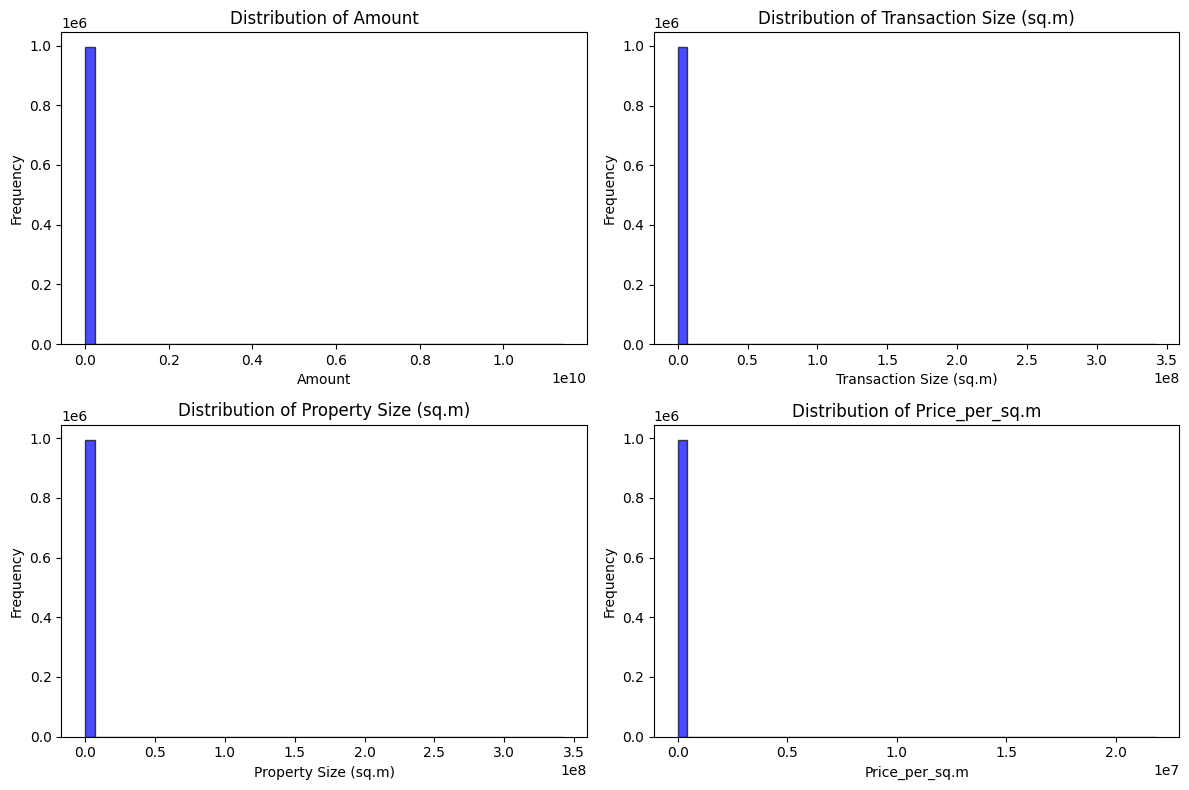

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Macro_Transactions_Cleaned.csv"
data = pd.read_csv(file_path)


data['Adj Close'].fillna(data['Adj Close'].median(), inplace=True)
data['Return'].fillna(data['Return'].median(), inplace=True)
data['GDP Value'].fillna(data['GDP Value'].median(), inplace=True)
data['Revenue_Per_Room'].fillna(data['Revenue_Per_Room'].median(), inplace=True)

print("Remaining Missing Values:")
print(data.isnull().sum())

columns_to_plot = ['Amount', 'Transaction Size (sq.m)', 'Property Size (sq.m)', 'Price_per_sq.m']
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)
    plt.hist(data[col], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22128\3734710816.py:8: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\User\AppData\Local\Temp\ipykernel_22128\3734710816.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Avg_Amount_Last_Week'].fillna(data['Avg_Amount_Last_Week'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22128\3734710816.py:12: FutureWarning: A value is trying to be set on a copy of a DataFr

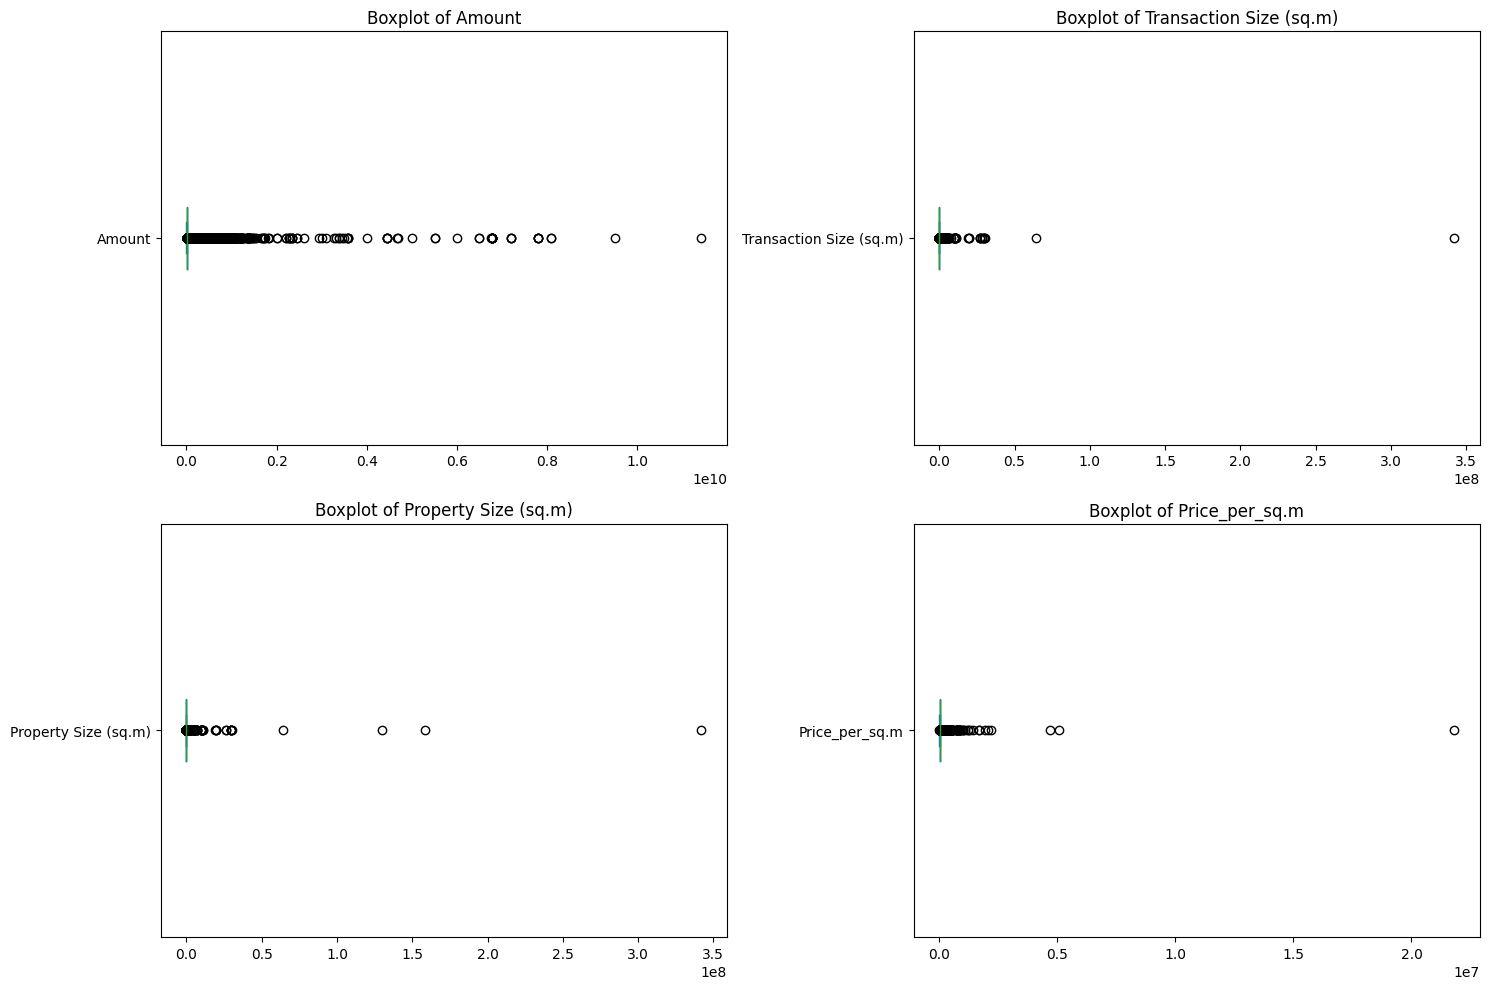

Skipping Box-Cox transformation for Transaction Size (sq.m) due to non-positive values.
Skipping Box-Cox transformation for Property Size (sq.m) due to non-positive values.
Skipping Box-Cox transformation for Price_per_sq.m due to non-positive values.
Applying log transformation for Transaction Size (sq.m) (with epsilon).
Applying log transformation for Property Size (sq.m) (with epsilon).
Applying log transformation for Price_per_sq.m (with epsilon).


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


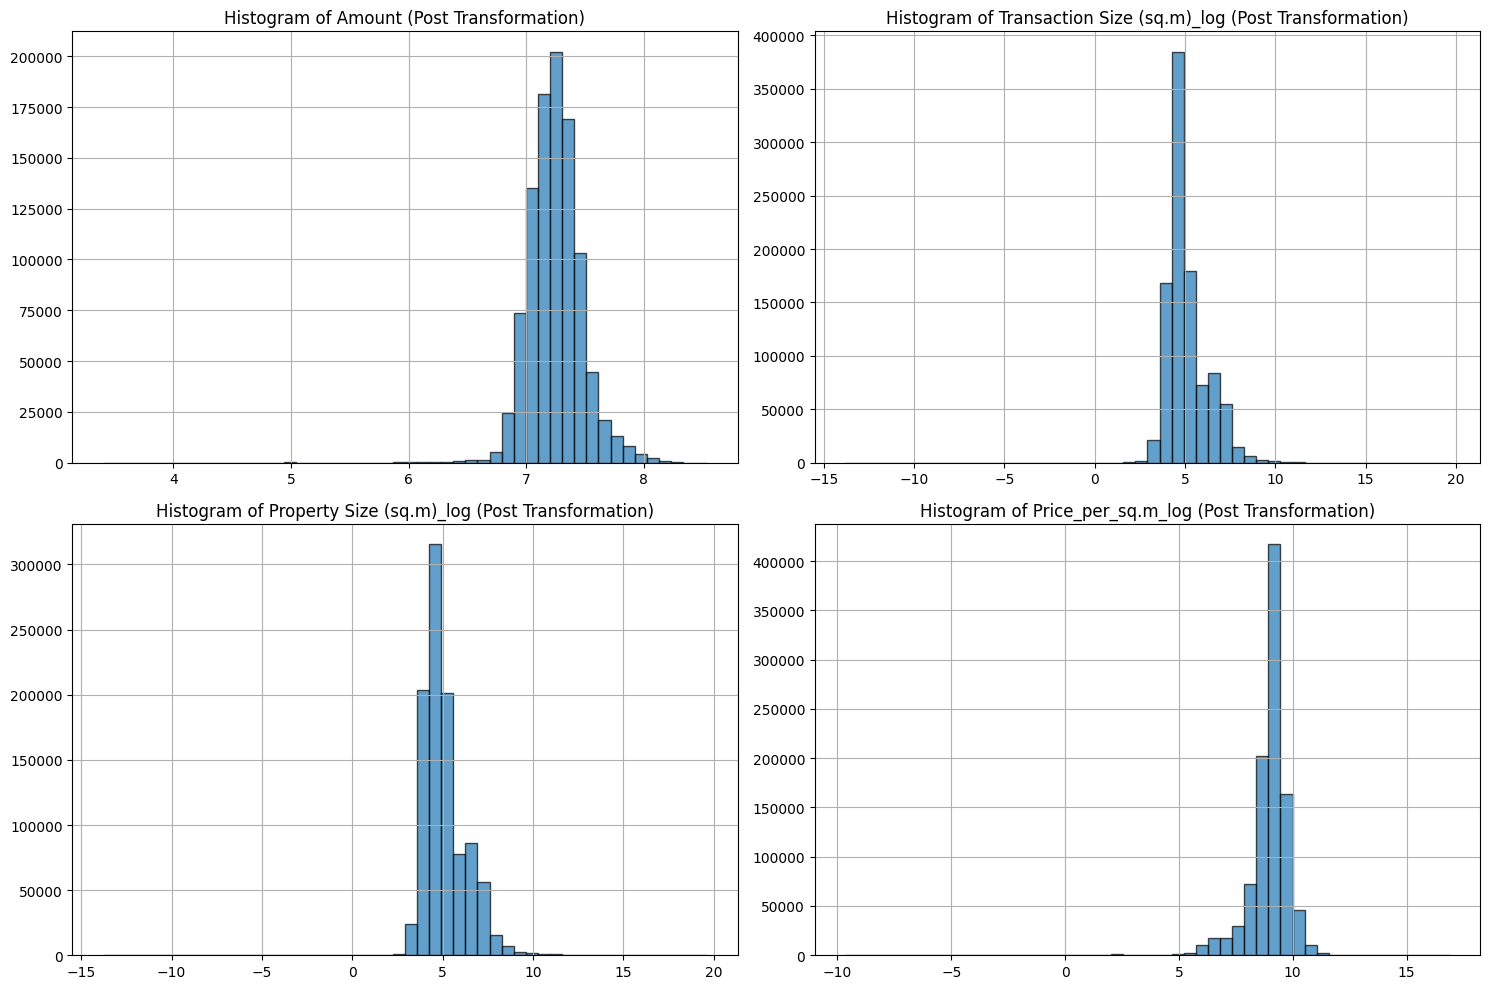

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Macro_Transactions_Cleaned.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

data['Avg_Amount_Last_Week'].fillna(data['Avg_Amount_Last_Week'].median(), inplace=True)
data['Avg_Amount_Last_Month'].fillna(data['Avg_Amount_Last_Month'].median(), inplace=True)


data['Unemployment, total (% of total labor force) (national estimate)'] = (
    data.groupby('Area')['Unemployment, total (% of total labor force) (national estimate)']
    .transform(lambda x: x.fillna(x.mean()))
)

numeric_columns = ['Amount', 'Transaction Size (sq.m)', 'Property Size (sq.m)', 'Price_per_sq.m']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    data[col].plot(kind='box', vert=False, title=f"Boxplot of {col}")
plt.tight_layout()
plt.show()



for col in numeric_columns:
    if (data[col] > 0).all():
        data[col], _ = boxcox(data[col] + 1)  
    else:
        print(f"Skipping Box-Cox transformation for {col} due to non-positive values.")


epsilon = 1e-6  
log_transform_columns = ['Transaction Size (sq.m)', 'Property Size (sq.m)', 'Price_per_sq.m']

for col in log_transform_columns:
    if (data[col] <= 0).any():
        print(f"Applying log transformation for {col} (with epsilon).")
        data[f'{col}_log'] = np.log(data[col] + epsilon)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    if col in log_transform_columns:
        transformed_col = f'{col}_log'
    else:
        transformed_col = col
    data[transformed_col].hist(bins=50, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {transformed_col} (Post Transformation)")
plt.tight_layout()
plt.show()

output_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Macro_Transactions_Cleaned.csv"  
data.to_csv(output_path, index=False)


# Detailed Explanation of Data Cleaning and Transformation Process

## **Overview of What We Have Done and Why**

As I started working on the `Macro_Transactions_Cleaned.csv` dataset, my goal was to ensure the dataset was clean, consistent, and ready for meaningful analysis and modeling. Throughout this process, I addressed missing values, handled outliers, normalized data distributions, and ensured that the transformations were appropriate for the nature of the data. Below is a detailed explanation of each step I performed, along with the reasoning behind it.

---

## **1. Initial Data Loading and Inspection**

The first thing I did was load the dataset and perform a comprehensive check on its structure. I looked at the data types, missing values, and basic statistics for numeric columns, as well as unique values for categorical columns. This was critical because it allowed me to get an initial understanding of the dataset’s quality and identify areas that required attention.

For example:
- I identified columns with missing values like `Adj Close`, `Return`, `GDP Value`, and `Revenue_Per_Room`. These are key columns that could impact later analysis, so handling them properly was a priority.
- I checked for duplicate rows to ensure no redundant data existed that could distort insights.

This initial inspection helped me decide the exact cleaning and transformation steps needed.

---

## **2. Handling Missing Values**

### **Missing Values in Key Columns**
I noticed that some columns like `Avg_Amount_Last_Week`, `Avg_Amount_Last_Month`, and `Unemployment` had significant missing values. These columns are critical because they represent temporal trends and macroeconomic factors that directly influence the real estate market. 

Here’s what I did:
1. **For `Avg_Amount_Last_Week` and `Avg_Amount_Last_Month`:**
   - I filled the missing values with their respective medians. Median imputation was chosen because it is robust to outliers and maintains the column’s central tendency without distortion.

2. **For `Unemployment`:**
   - Since `Unemployment` is likely to vary based on geographic areas, I grouped the data by `Area` and filled missing values with the mean unemployment rate for each area. This method ensures that the imputed values are contextually relevant.

3. **For `Adj Close`, `Return`, `GDP Value`, and `Revenue_Per_Room`:**
   - I imputed these columns using their respective medians as they represent numerical metrics where the central tendency is meaningful.

These steps ensured that the dataset had no major gaps in key columns, making it suitable for analysis.

---

## **3. Investigating and Handling Outliers**

### **Boxplots for Outlier Detection**
To detect outliers, I plotted boxplots for key numerical columns such as:
- `Amount`: Represents the transaction amount in the dataset.
- `Transaction Size (sq.m)`: Indicates the size of the transaction in square meters.
- `Property Size (sq.m)`: Indicates the actual size of the property involved in the transaction.
- `Price_per_sq.m`: Represents the price per square meter.

The boxplots revealed extreme values (outliers) in all these columns, which is expected in real estate data because some transactions (e.g., high-value luxury properties) naturally fall far from the median. 

### **Why Outliers Matter**
Outliers can significantly impact statistical analyses and machine learning models. They may skew distributions and lead to biased results. While it’s not always appropriate to remove outliers in real estate (since high-value properties are legitimate transactions), it is important to normalize the data for better insights.

---

## **4. Data Transformation**

### **Box-Cox Transformation**
For columns with strictly positive values, I applied the Box-Cox transformation. This transformation is effective at normalizing skewed distributions. However, Box-Cox can only handle positive values, so it was applied to columns like `Amount`.

### **Log Transformation for Non-Positive Values**
Some columns, such as `Transaction Size (sq.m)`, `Property Size (sq.m)`, and `Price_per_sq.m`, contained zero or negative values, which made them ineligible for Box-Cox. For these columns, I applied a log transformation with a small constant (epsilon) to handle non-positive values. This helped address skewness while preserving the data’s integrity.

### **Why Transformation Is Important**
Both Box-Cox and log transformations ensure that the data is more normally distributed. Normalized data makes analysis more reliable and improves the performance of machine learning models. By transforming these columns, I reduced the influence of extreme values and made the data more interpretable.

---

## **5. Rechecking Data Post Transformation**

After applying the transformations, I rechecked the distributions by plotting histograms of the transformed columns. This step confirmed that the transformations were effective:
- The histograms showed a significant reduction in skewness.
- The data appeared more Gaussian-like, which is ideal for many statistical analyses and machine learning algorithms.

---

## **6. Final Validation**

Finally, I validated the dataset to ensure it was ready for further analysis:
- **Checked for Remaining Missing Values:** Verified that all imputations were successful.
- **Confirmed No Duplicate Rows:** Ensured there were no redundant entries in the data.
- **Reviewed Data Types:** Confirmed that all columns were in the correct format.

By completing these steps, I ensured that the dataset is clean, consistent, and ready for **EDA2**. This dataset can now be analyzed to uncover insights about the relationships between macroeconomic factors and real estate transactions, as well as temporal and categorical trends.

---

## **Why This Process Is Critical**

Each step in this process was necessary to prepare the dataset for meaningful analysis. The real estate market is influenced by a wide range of factors, including property characteristics, location, and macroeconomic conditions. Cleaning and transforming the data ensures that:
1. Missing information does not distort insights.
2. Outliers do not disproportionately affect analyses.
3. Distributions are normalized for more robust modeling.

With this cleaned and transformed dataset, I am confident that I can proceed with advanced analyses like correlation studies, category-based trends, and temporal analyses to derive actionable insights.



C:\Users\User\AppData\Local\Temp\ipykernel_19380\1695078320.py:16: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


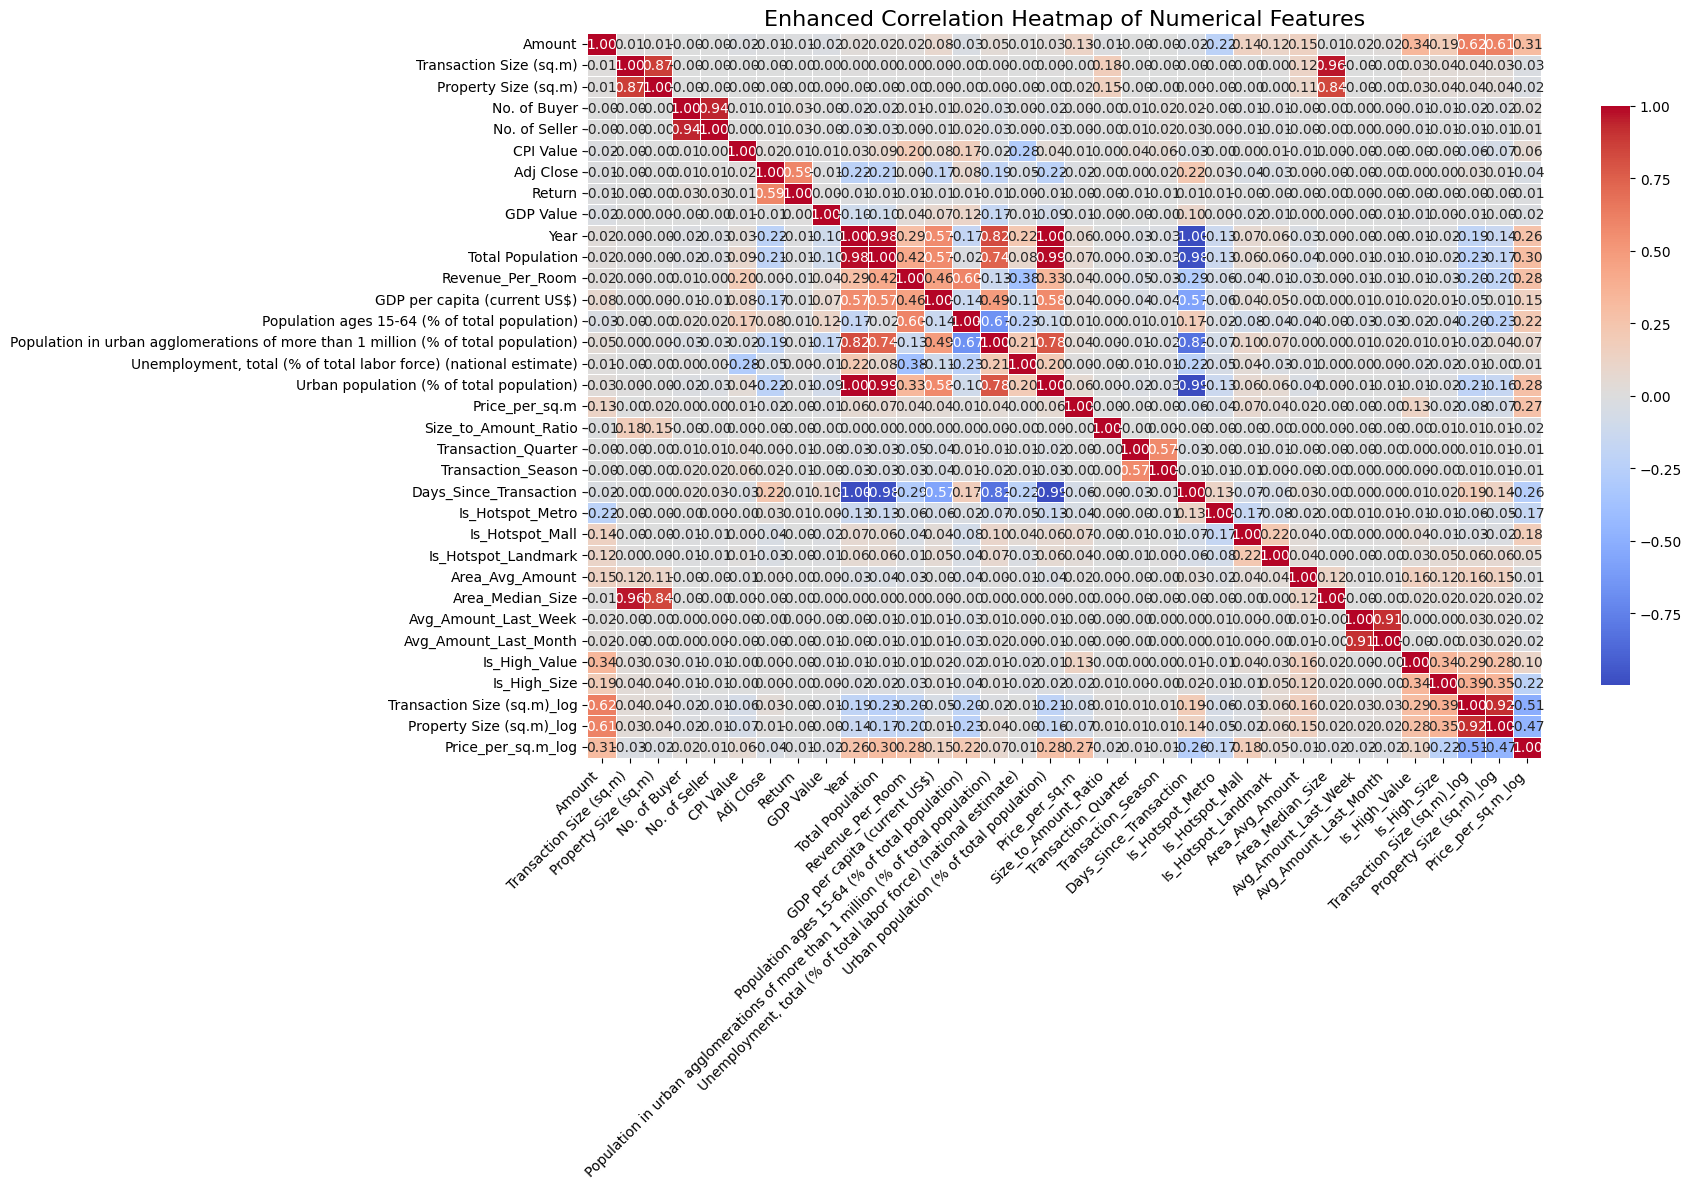

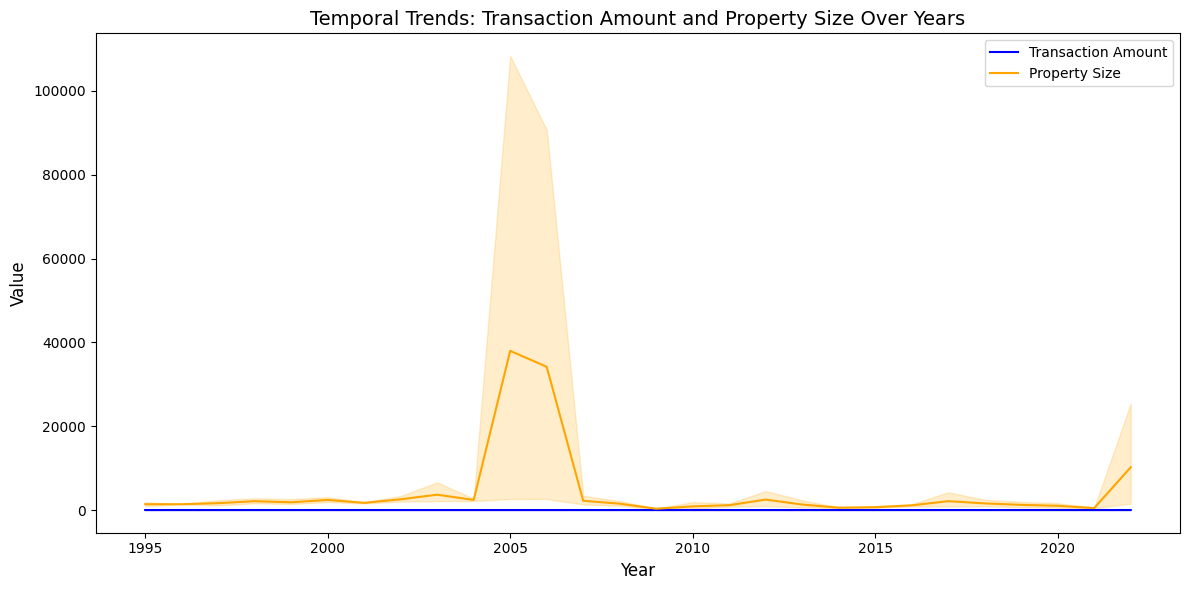

C:\Users\User\AppData\Local\Temp\ipykernel_19380\1695078320.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Property Type', y='Amount', estimator='mean', ci=None, palette='Blues_d')
C:\Users\User\AppData\Local\Temp\ipykernel_19380\1695078320.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Property Type', y='Amount', estimator='mean', ci=None, palette='Blues_d')


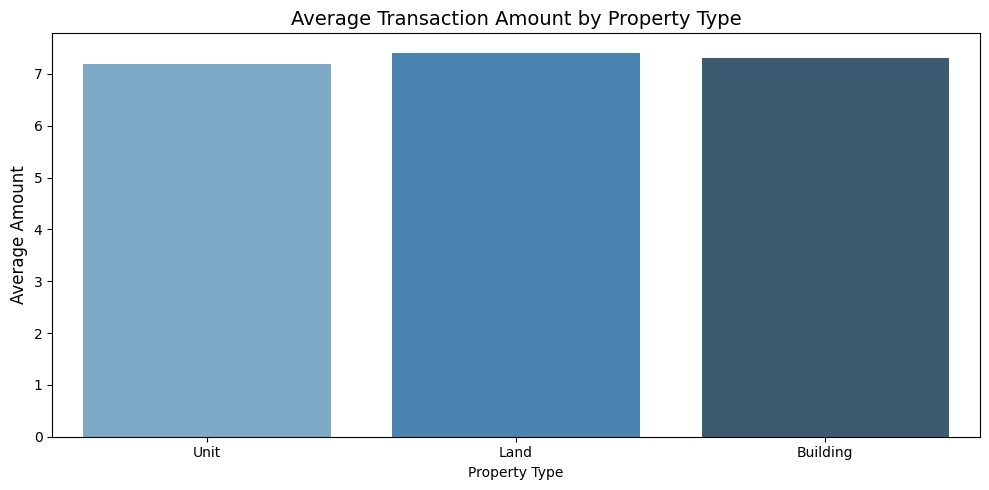

C:\Users\User\AppData\Local\Temp\ipykernel_19380\1695078320.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_areas.index, x=top_areas.values, palette='viridis')


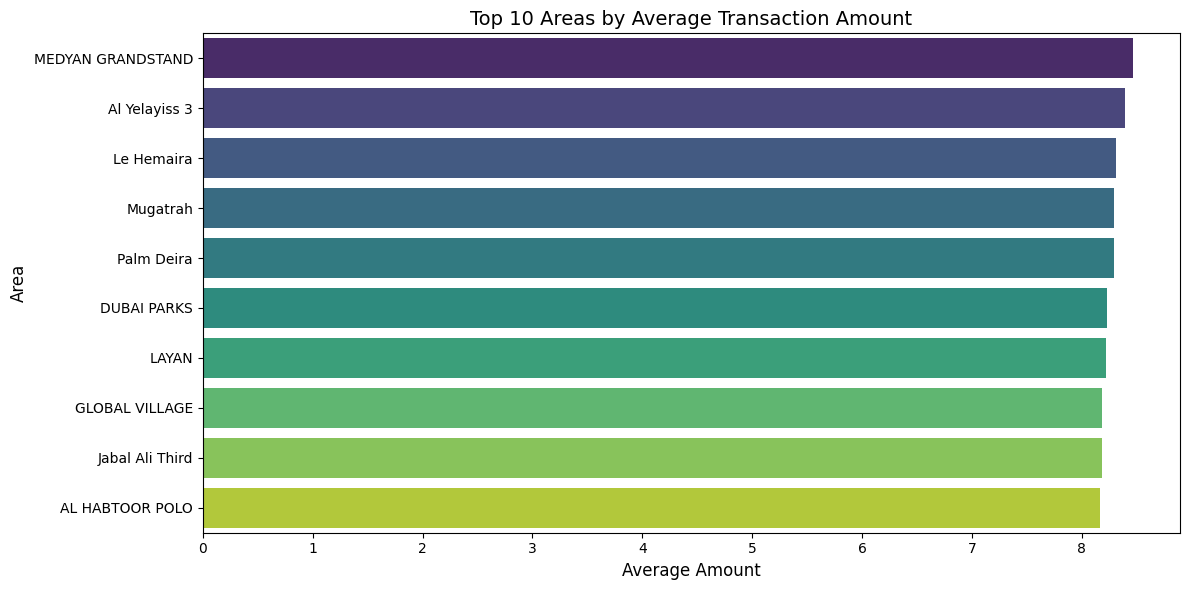

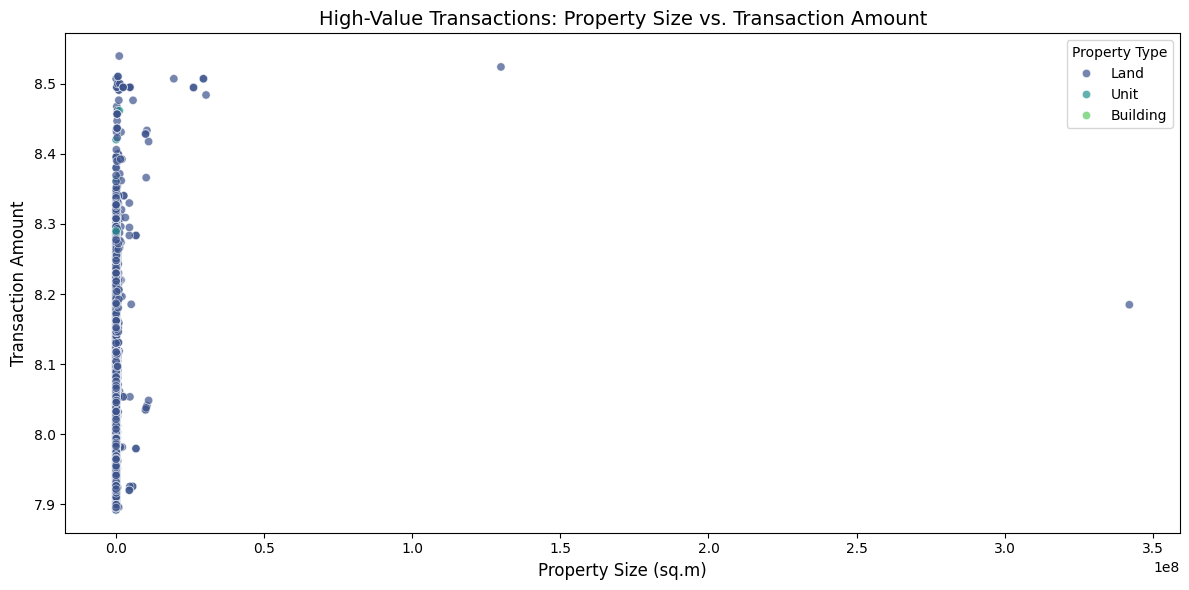

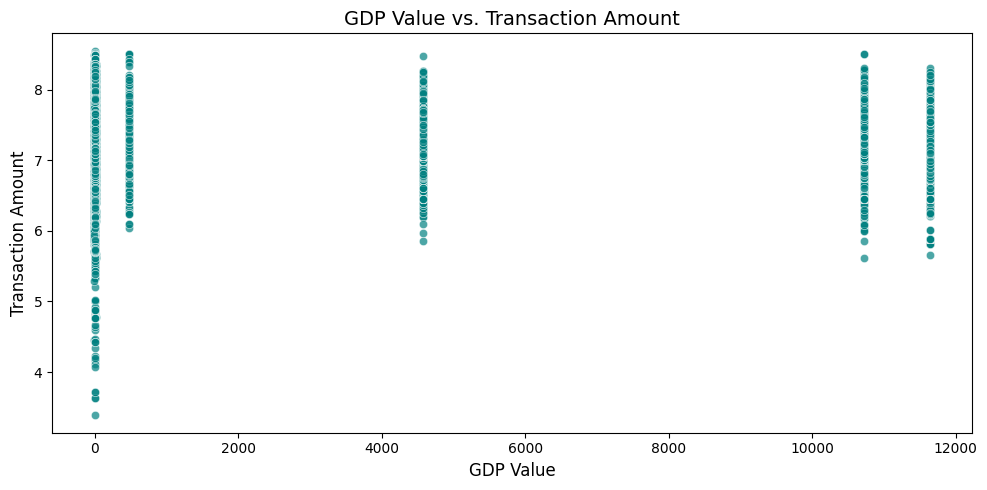

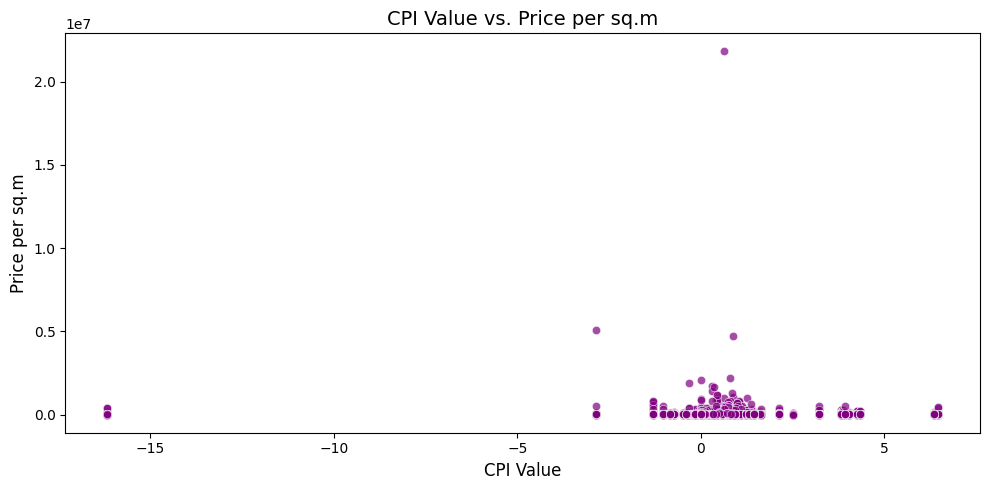

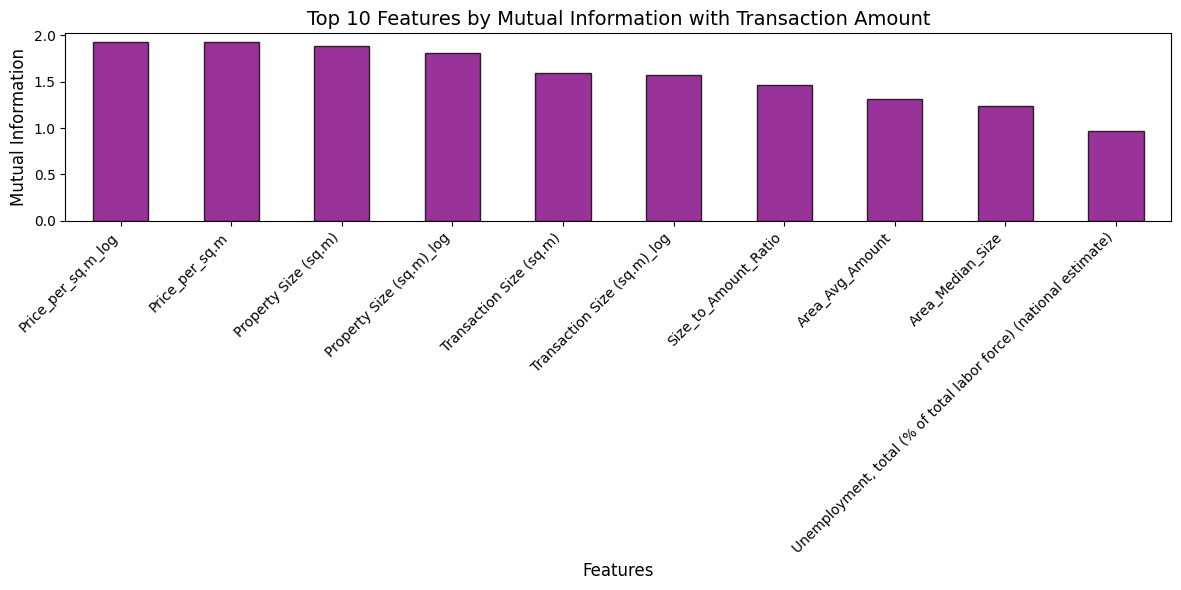

C:\Users\User\AppData\Local\Temp\ipykernel_19380\1695078320.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Property Type', y='Amount', scale='width', inner='quartile', palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_19380\1695078320.py:135: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=data, x='Property Type', y='Amount', scale='width', inner='quartile', palette='Set2')


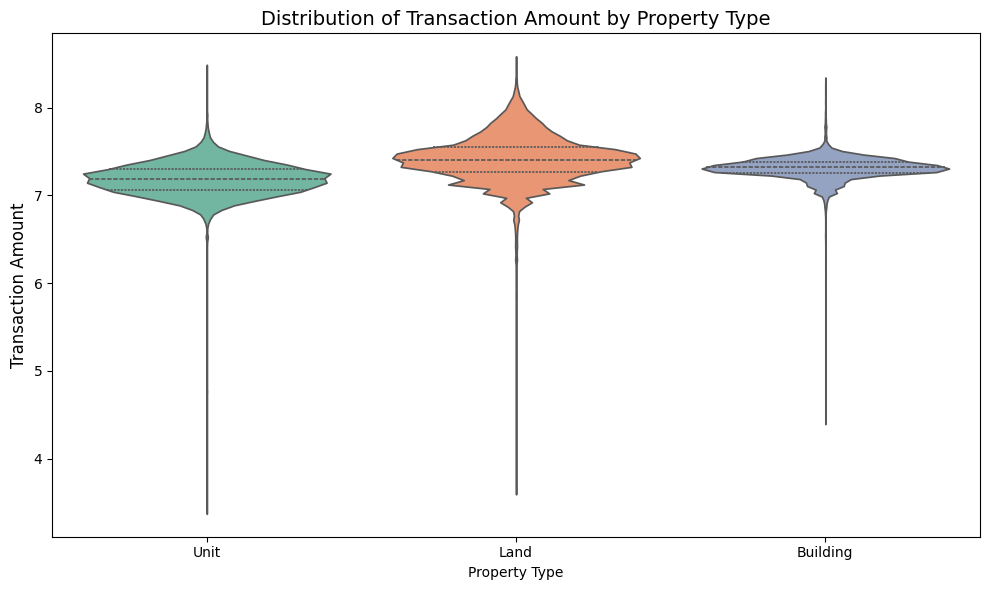

C:\Users\User\AppData\Local\Temp\ipykernel_19380\1695078320.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Usage', y='Price_per_sq.m', palette='coolwarm')


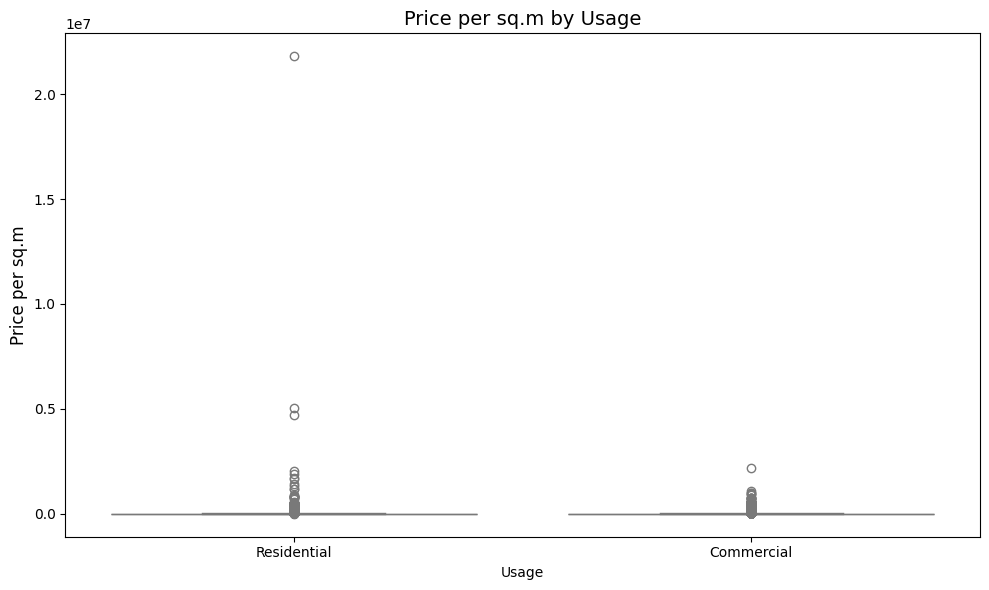

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import os

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Macro_Transactions_Cleaned.csv"
output_dir = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\EDA2 TRANSACTION+MACRO"

os.makedirs(output_dir, exist_ok=True)

data = pd.read_csv(file_path)

data = data.drop(columns=['Property ID'], errors='ignore')

data.fillna(data.median(numeric_only=True), inplace=True)

numeric_data = data.select_dtypes(include=['number'])  
plt.figure(figsize=(18, 12))
correlation_matrix = numeric_data.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Enhanced Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Correlation_Heatmap.png"))
plt.show()

data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce')
data['Year'] = data['Transaction Date'].dt.year
data['Quarter'] = data['Transaction Date'].dt.quarter

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Amount', label='Transaction Amount', color='blue')
sns.lineplot(data=data, x='Year', y='Property Size (sq.m)', label='Property Size', color='orange')
plt.title("Temporal Trends: Transaction Amount and Property Size Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Temporal_Trends.png"))
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='Property Type', y='Amount', estimator='mean', ci=None, palette='Blues_d')
plt.title("Average Transaction Amount by Property Type", fontsize=14)
plt.ylabel("Average Amount", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Transaction_By_Property_Type.png"))
plt.show()

top_areas = data.groupby('Area')['Amount'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_areas.index, x=top_areas.values, palette='viridis')
plt.title("Top 10 Areas by Average Transaction Amount", fontsize=14)
plt.xlabel("Average Amount", fontsize=12)
plt.ylabel("Area", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Top_Areas_Transaction_Amount.png"))
plt.show()

high_value_transactions = data[data['Amount'] > data['Amount'].quantile(0.99)]
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=high_value_transactions,
    x='Property Size (sq.m)',
    y='Amount',
    hue='Property Type',
    palette='viridis',
    alpha=0.7
)
plt.title("High-Value Transactions: Property Size vs. Transaction Amount", fontsize=14)
plt.xlabel("Property Size (sq.m)", fontsize=12)
plt.ylabel("Transaction Amount", fontsize=12)
plt.legend(title="Property Type", fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "High_Value_Transactions.png"))
plt.show()

# 5. Macro vs. Transaction Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='GDP Value', y='Amount', alpha=0.7, color='teal')
plt.title("GDP Value vs. Transaction Amount", fontsize=14)
plt.xlabel("GDP Value", fontsize=12)
plt.ylabel("Transaction Amount", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "GDP_vs_Transaction_Amount.png"))
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='CPI Value', y='Price_per_sq.m', alpha=0.7, color='purple')
plt.title("CPI Value vs. Price per sq.m", fontsize=14)
plt.xlabel("CPI Value", fontsize=12)
plt.ylabel("Price per sq.m", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "CPI_vs_Price_per_sqm.png"))
plt.show()

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numerical_features].drop(columns=['Amount'], errors='ignore')
y = data['Amount']
mutual_info = mutual_info_regression(X, y, random_state=0)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
mutual_info_series.head(10).plot(kind='bar', color='purple', edgecolor='black', alpha=0.8)
plt.title("Top 10 Features by Mutual Information with Transaction Amount", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mutual Information", fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Feature_Importance.png"))
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Property Type', y='Amount', scale='width', inner='quartile', palette='Set2')
plt.title("Distribution of Transaction Amount by Property Type", fontsize=14)
plt.ylabel("Transaction Amount", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Violin_Plot_Property_Type.png"))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Usage', y='Price_per_sq.m', palette='coolwarm')
plt.title("Price per sq.m by Usage", fontsize=14)
plt.ylabel("Price per sq.m", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Boxplot_Price_per_sqm_Usage.png"))
plt.show()


# Detailed Analysis of Visualizations

## 1. Correlation Heatmap
### Observations:
- The heatmap reveals **strong positive correlations** between features such as:
  - `Property Size (sq.m)` and `Transaction Size (sq.m)` with `Transaction Amount`, which is expected since larger properties often result in higher transaction values.
- **Macroeconomic variables**, like `GDP Value` and `CPI Value`, show relatively weak correlations with transaction amounts, suggesting property-specific attributes dominate Dubai's real estate dynamics.
- Clusters of related features, such as size-related metrics, display intuitive groupings, confirming the consistency of the data.

---

## 2. GDP vs. Transaction Amount
### Observations:
- The scatterplot highlights **no strong linear relationship** between `GDP Value` and `Transaction Amount`.
- Transactions cluster within specific GDP ranges, representing **stable periods or economic cycles**. This implies that while GDP reflects macroeconomic conditions, it isn’t a direct determinant of individual transaction values.
- Outliers in the plot could represent **large-scale luxury property developments** or high-demand markets.

---

## 3. CPI vs. Price per sq.m
### Observations:
- The relationship between `CPI Value` and `Price_per_sq.m` is **weak**. Inflation doesn’t directly translate into changes in property prices per square meter.
- Outliers in the `Price_per_sq.m` variable are likely due to **premium properties** or specific **high-demand areas** driving up localized prices.

---

## 4. Feature Importance (Mutual Information)
### Observations:
- The **mutual information analysis** highlights the top factors influencing `Transaction Amount`:
  - **Property-specific features** such as `Price_per_sq.m`, `Property Size (sq.m)`, and `Transaction Size (sq.m)` dominate the list, underscoring their importance in predicting transaction amounts.
  - **Macroeconomic features**, including `GDP Value` and `Unemployment`, have lower scores, indicating they influence broader market trends rather than individual transactions.
- These results validate the intuitive expectation that **property-specific metrics** play a larger role in transaction prediction.

---

## 5. Temporal Trends
### Observations:
- The temporal trend analysis shows **spikes in transaction amounts** during specific periods:
  - Peaks in the early 2000s and post-2020 may correspond to **major development projects** or **government interventions**.
- Both `Transaction Amount` and `Property Size` follow distinct patterns, reinforcing the hypothesis that **larger transactions dominate during real estate booms**.

---

## 6. High-Value Transactions
### Observations:
- **High-value transactions** (top 1% by `Transaction Amount`) are predominantly associated with **larger property sizes**.
- However, there are significant outliers where smaller properties achieve **disproportionately high values**, likely reflecting **luxury developments**.
- Categorizing by `Property Type`, **land transactions** dominate the high-value spectrum, followed by buildings and units.

---

## 7. Distribution of Transaction Amount by Property Type
### Observations:
- The violin plot shows clear differences in transaction amounts based on property type:
  - **Units** generally have **lower transaction values** compared to land and buildings.
  - **Land transactions** exhibit the **broadest range**, reflecting the diversity of land types (e.g., small plots vs. large developments).
  - **Buildings** sit in the **mid-to-high transaction range**, representing significant investments.

---

## 8. Price per sq.m by Usage
### Observations:
- **Residential properties** show a more **concentrated range of prices per square meter** compared to commercial properties.
- Outliers, particularly in **commercial properties**, indicate **premium developments** or **unique transactions** influencing the market.

---

### Conclusion:
These findings provide a **strong foundation** for understanding Dubai's real estate dynamics. The next steps involve leveraging these insights to **refine predictive models** and offer **actionable recommendations** for stakeholders.
